# Comprehensive Dataset Exploration: Porto Weather & Air Quality
## Complete EDA - All 31 Variables

**Objective:** Understand the full dataset structure, relationships between variables, and contextual factors that influence our target variables (temperature and PM2.5)

**Data Source:** Open-Meteo API (Historical Weather & Air Quality)
- Period: Last 5 years (hourly data)
- Location: Porto, Portugal (41.1496°N, 8.6109°W)
- Variables: 31 (20 weather + 10 air quality + UV index)

This notebook explores the ENTIRE dataset to provide context before focusing on specific time series modeling.

## 0. Setup

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# For statistical analysis
from scipy import stats
from scipy.stats import pearsonr, spearmanr

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.precision', 3)

# Set figure defaults
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 1. Load and Inspect Data

In [12]:
# Load the dataset
df = pd.read_csv('porto_weather_air_quality_5y.csv')

# Convert time to datetime and set as index
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

print("Dataset Overview:")
print(f"  Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"  Date range: {df.index.min()} to {df.index.max()}")
print(f"  Duration: {(df.index.max() - df.index.min()).days} days ({(df.index.max() - df.index.min()).days/365:.2f} years)")
print(f"  Frequency: Hourly ({len(df)/24:.0f} days of data)")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Overview:
  Shape: 43,824 rows × 30 columns
  Date range: 2020-12-06 00:00:00 to 2025-12-05 23:00:00
  Duration: 1825 days (5.00 years)
  Frequency: Hourly (1826 days of data)

Memory usage: 10.36 MB


In [13]:
# Display first and last rows
print("First 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

First 5 rows:


temperature_2m  relative_humidity_2m  dew_point_2m  \
time                                                                      
2020-12-06 00:00:00             7.3                    84           4.8   
2020-12-06 01:00:00             7.0                    87           5.0   
2020-12-06 02:00:00             6.4                    90           4.9   
2020-12-06 03:00:00             6.7                    89           5.1   
2020-12-06 04:00:00             7.0                    88           5.2   

                     apparent_temperature  pressure_msl  surface_pressure  \
time                                                                        
2020-12-06 00:00:00                   4.3        1014.8            1003.5   
2020-12-06 01:00:00                   4.4        1014.6            1003.3   
2020-12-06 02:00:00                   4.3        1014.3            1003.0   
2020-12-06 03:00:00                   4.6        1014.6            1003.3   
2020-12-06 04:00:00                   4.8        1014.6            1003.3   

                     precipitation  rain  snowfall  cloud_cover  \
time                                                              
2020-12-06 00:00:00            0.0   0.0       0.0           58   
2020-12-06 01:00:00            0.0   0.0       0.0           66   
2020-12-06 02:00:00            0.0   0.0       0.0           45   
2020-12-06 03:00:00            0.1   0.1       0.0           51   
2020-12-06 04:00:00            0.2   0.2       0.0           53   

                     cloud_cover_low  cloud_cover_mid  cloud_cover_high  \
time                                                                      
2020-12-06 00:00:00               28               47                 0   
2020-12-06 01:00:00               55               46                 0   
2020-12-06 02:00:00               16               40                 0   
2020-12-06 03:00:00               31               38                10   
2020-12-06 04:00:00               42               45                 0   

                     shortwave_radiation  direct_radiation  diffuse_radiation  \
time                                                                            
2020-12-06 00:00:00                  0.0               0.0                0.0   
2020-12-06 01:00:00                  0.0               0.0                0.0   
2020-12-06 02:00:00                  0.0               0.0                0.0   
2020-12-06 03:00:00                  0.0               0.0                0.0   
2020-12-06 04:00:00                  0.0               0.0                0.0   

                     windspeed_10m  windspeed_80m  winddirection_10m  \
time                                                                   
2020-12-06 00:00:00           12.0            NaN                351   
2020-12-06 01:00:00            9.4            NaN                356   
2020-12-06 02:00:00            6.1            NaN                360   
2020-12-06 03:00:00            6.5            NaN                357   
2020-12-06 04:00:00            6.5            NaN                 19   

                     winddirection_80m  pm10  pm2_5  carbon_monoxide  \
time                                                                   
2020-12-06 00:00:00                NaN  22.1    9.0            146.0   
2020-12-06 01:00:00                NaN  18.5    9.6            144.0   
2020-12-06 02:00:00                NaN  20.9   10.5            142.0   
2020-12-06 03:00:00                NaN  24.3   10.9            140.0   
2020-12-06 04:00:00                NaN  24.7   10.8            143.0   

                     nitrogen_dioxide  sulphur_dioxide  ozone  \
time                                                            
2020-12-06 00:00:00              15.2              1.3   32.0   
2020-12-06 01:00:00              15.2              1.4   34.0   
2020-12-06 02:00:00              14.7              1.2   35.0   
2020-12-06 03:00:00              14.0              1.3  


Last 5 rows:


temperature_2m  relative_humidity_2m  dew_point_2m  \
time                                                                      
2025-12-05 19:00:00            15.2                    97          14.7   
2025-12-05 20:00:00            15.3                    96          14.6   
2025-12-05 21:00:00            15.3                    96          14.7   
2025-12-05 22:00:00            15.2                    96          14.5   
2025-12-05 23:00:00            15.1                    97          14.6   

                     apparent_temperature  pressure_msl  surface_pressure  \
time                                                                        
2025-12-05 19:00:00                  13.5        1019.3            1008.3   
2025-12-05 20:00:00                  13.7        1019.5            1008.5   
2025-12-05 21:00:00                  13.2        1019.6            1008.6   
2025-12-05 22:00:00                  13.0        1019.7            1008.7   
2025-12-05 23:00:00                  13.3        1019.7            1008.7   

                     precipitation  rain  snowfall  cloud_cover  \
time                                                              
2025-12-05 19:00:00            0.9   0.9       0.0          100   
2025-12-05 20:00:00            0.2   0.2       0.0          100   
2025-12-05 21:00:00            0.4   0.4       0.0          100   
2025-12-05 22:00:00            1.7   1.7       0.0          100   
2025-12-05 23:00:00            1.4   1.4       0.0          100   

                     cloud_cover_low  cloud_cover_mid  cloud_cover_high  \
time                                                                      
2025-12-05 19:00:00               33               98               100   
2025-12-05 20:00:00               34               96               100   
2025-12-05 21:00:00               88              100                99   
2025-12-05 22:00:00              100              100               100   
2025-12-05 23:00:00              100              100                91   

                     shortwave_radiation  direct_radiation  diffuse_radiation  \
time                                                                            
2025-12-05 19:00:00                  0.0               0.0                0.0   
2025-12-05 20:00:00                  0.0               0.0                0.0   
2025-12-05 21:00:00                  0.0               0.0                0.0   
2025-12-05 22:00:00                  0.0               0.0                0.0   
2025-12-05 23:00:00                  0.0               0.0                0.0   

                     windspeed_10m  windspeed_80m  winddirection_10m  \
time                                                                   
2025-12-05 19:00:00           21.9            NaN                228   
2025-12-05 20:00:00           21.2            NaN                219   
2025-12-05 21:00:00           25.0            NaN                223   
2025-12-05 22:00:00           24.7            NaN                222   
2025-12-05 23:00:00           23.1            NaN                221   

                     winddirection_80m  pm10  pm2_5  carbon_monoxide  \
time                                                                   
2025-12-05 19:00:00                NaN  17.6    6.8            126.0   
2025-12-05 20:00:00                NaN  15.4    6.7            125.0   
2025-12-05 21:00:00                NaN  13.5    6.4            124.0   
2025-12-05 22:00:00                NaN  12.9    5.7            122.0   
2025-12-05 23:00:00                NaN  11.6    4.7            120.0   

                     nitrogen_dioxide  sulphur_dioxide  ozone  \
time                                                            
2025-12-05 19:00:00               6.6              0.6   68.0   
2025-12-05 20:00:00               6.7              0.6   69.0   
2025-12-05 21:00:00               5.1              0.5   71.0   
2025-12-05 22:00:00               3.8              0.5  

In [14]:
# Dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2020-12-06 00:00:00 to 2025-12-05 23:00:00
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temperature_2m         43824 non-null  float64
 1   relative_humidity_2m   43824 non-null  int64  
 2   dew_point_2m           43824 non-null  float64
 3   apparent_temperature   43824 non-null  float64
 4   pressure_msl           43824 non-null  float64
 5   surface_pressure       43824 non-null  float64
 6   precipitation          43824 non-null  float64
 7   rain                   43824 non-null  float64
 8   snowfall               43824 non-null  float64
 9   cloud_cover            43824 non-null  int64  
 10  cloud_cover_low        43824 non-null  int64  
 11  cloud_cover_mid        43824 non-null  int64  
 12  cloud_cover_high       43824 non-null  int64  
 13  shortwave_radiation    43824 non-null  float64
 14

## 2. Variable Categories

Let's organize the 31 variables into logical groups

In [15]:
# Define variable groups
var_groups = {
    'Temperature & Humidity': [
        'temperature_2m',
        'apparent_temperature',
        'dew_point_2m',
        'relative_humidity_2m'
    ],
    'Pressure': [
        'pressure_msl',
        'surface_pressure'
    ],
    'Precipitation': [
        'precipitation',
        'rain',
        'snowfall'
    ],
    'Cloud Cover': [
        'cloud_cover',
        'cloud_cover_low',
        'cloud_cover_mid',
        'cloud_cover_high'
    ],
    'Solar Radiation': [
        'shortwave_radiation',
        'direct_radiation',
        'diffuse_radiation'
    ],
    'Wind': [
        'windspeed_10m',
        'windspeed_80m',
        'winddirection_10m',
        'winddirection_80m'
    ],
    'Air Quality - Particulates': [
        'pm10',
        'pm2_5',
        'dust'
    ],
    'Air Quality - Gases': [
        'carbon_monoxide',
        'nitrogen_dioxide',
        'sulphur_dioxide',
        'ozone'
    ],
    'Air Quality - Other': [
        'aerosol_optical_depth'
    ],
    'UV Index': [
        'uv_index',
        'uv_index_clear_sky'
    ]
}

# Print organized structure
print("="*70)
print("DATASET VARIABLE STRUCTURE")
print("="*70)
total_vars = 0
for category, variables in var_groups.items():
    print(f"\n{category} ({len(variables)} variables):")
    for var in variables:
        print(f"  • {var}")
    total_vars += len(variables)
print(f"\nTotal: {total_vars} variables")
print("="*70)

DATASET VARIABLE STRUCTURE

Temperature & Humidity (4 variables):
  • temperature_2m
  • apparent_temperature
  • dew_point_2m
  • relative_humidity_2m

Pressure (2 variables):
  • pressure_msl
  • surface_pressure

Precipitation (3 variables):
  • precipitation
  • rain
  • snowfall

Cloud Cover (4 variables):
  • cloud_cover
  • cloud_cover_low
  • cloud_cover_mid
  • cloud_cover_high

Solar Radiation (3 variables):
  • shortwave_radiation
  • direct_radiation
  • diffuse_radiation

Wind (4 variables):
  • windspeed_10m
  • windspeed_80m
  • winddirection_10m
  • winddirection_80m

Air Quality - Particulates (3 variables):
  • pm10
  • pm2_5
  • dust

Air Quality - Gases (4 variables):
  • carbon_monoxide
  • nitrogen_dioxide
  • sulphur_dioxide
  • ozone

Air Quality - Other (1 variables):
  • aerosol_optical_depth

UV Index (2 variables):
  • uv_index
  • uv_index_clear_sky

Total: 30 variables


## 3. Missing Values Analysis

In [16]:
# Calculate missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
}).sort_values('Percentage', ascending=False)

print("Missing Values Summary:")
print(f"  Total cells: {df.shape[0] * df.shape[1]:,}")
print(f"  Missing cells: {missing.sum():,}")
print(f"  Overall missing rate: {(missing.sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

print("\nVariables with missing values:")
if missing_df['Missing_Count'].sum() > 0:
    display(missing_df[missing_df['Missing_Count'] > 0])
else:
    print("  ✓ No missing values in the dataset!")

Missing Values Summary:
  Total cells: 1,314,720
  Missing cells: 131,280
  Overall missing rate: 9.99%

Variables with missing values:


Missing_Count  Percentage
winddirection_80m              43824     100.000
windspeed_80m                  43824     100.000
uv_index_clear_sky             14544      33.187
uv_index                       14544      33.187
aerosol_optical_depth          14544      33.187

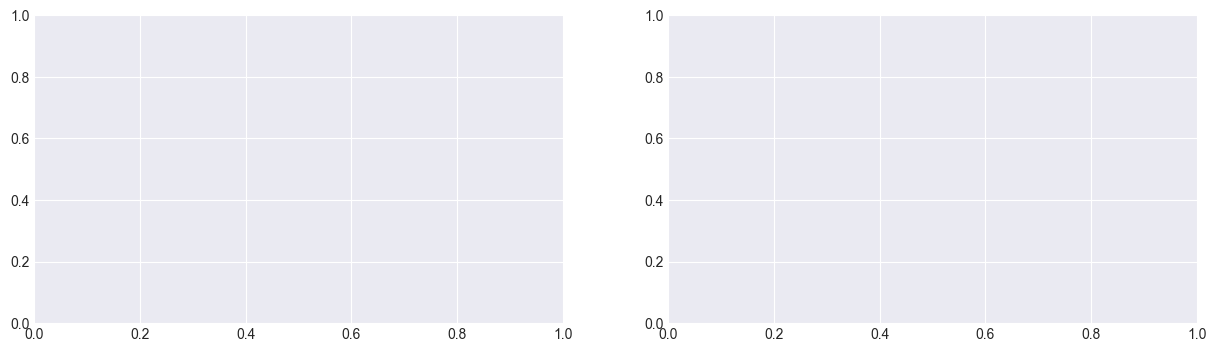

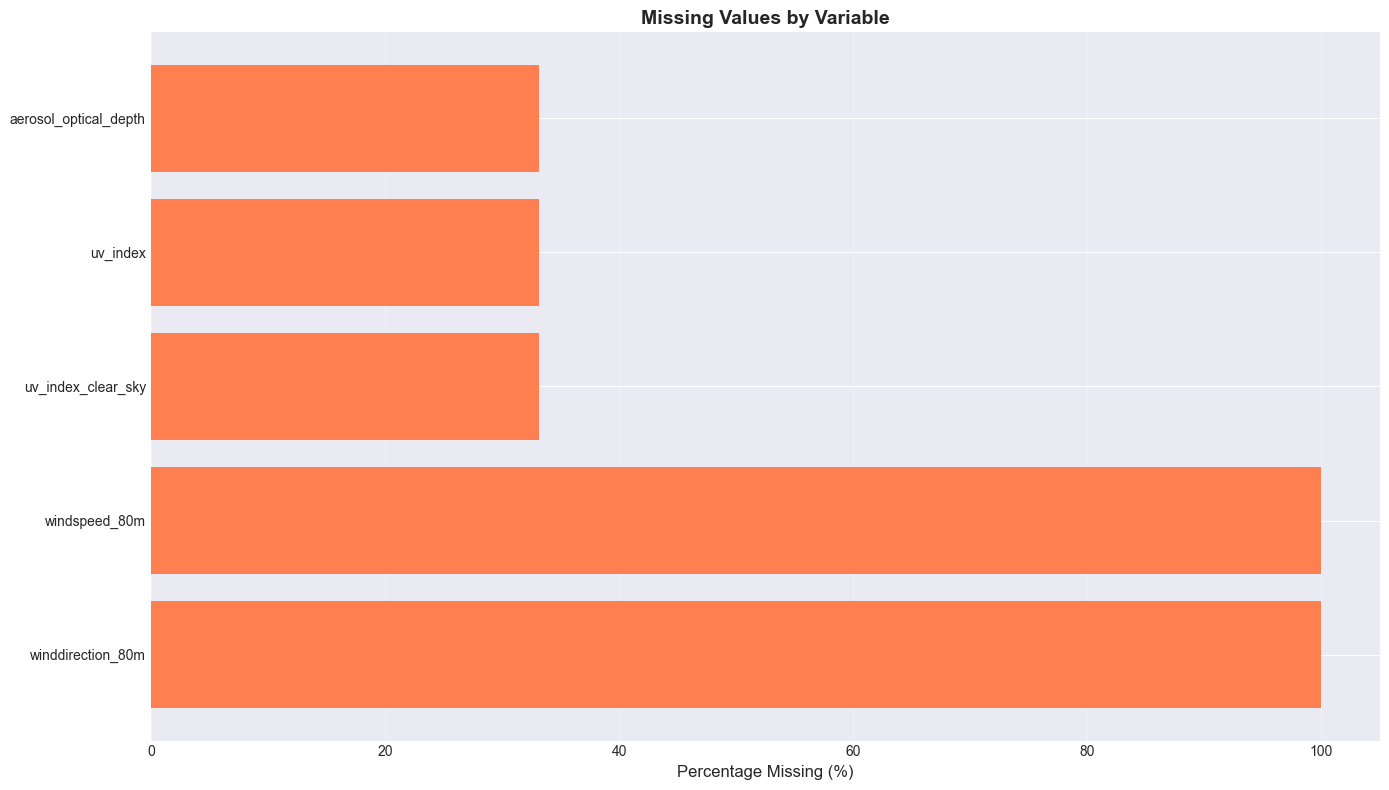

In [17]:
# Visualize missing values if any exist
if missing_df['Missing_Count'].sum() > 0:
    fig, ax = plt.subplots(figsize=(14, 8))
    missing_vars = missing_df[missing_df['Missing_Count'] > 0]
    
    ax.barh(missing_vars.index, missing_vars['Percentage'], color='coral')
    ax.set_xlabel('Percentage Missing (%)', fontsize=12)
    ax.set_title('Missing Values by Variable', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values to visualize!")

## 4. Descriptive Statistics by Category

In [18]:
# Summary statistics for each category
for category, variables in var_groups.items():
    print("\n" + "="*80)
    print(f"{category.upper()}")
    print("="*80)
    display(df[variables].describe())
    
    # Additional statistics
    print("\nSkewness:")
    print(df[variables].skew())
    print("\nKurtosis:")
    print(df[variables].kurtosis())


TEMPERATURE & HUMIDITY


temperature_2m  apparent_temperature  dew_point_2m  \
count       43824.000             43824.000     43824.000   
mean           15.365                14.170        11.304   
std             4.863                 6.255         4.663   
min            -0.200                -4.700        -8.800   
25%            12.100                 9.800         8.300   
50%            15.300                14.100        11.900   
75%            18.400                18.500        15.000   
max            36.200                40.800        25.000   

       relative_humidity_2m  
count             43824.000  
mean                 78.413  
std                  14.909  
min                  12.000  
25%                  69.000  
50%                  81.000  
75%                  91.000  
max                 100.000


Skewness:
temperature_2m          0.207
apparent_temperature    0.141
dew_point_2m           -0.609
relative_humidity_2m   -0.753
dtype: float64

Kurtosis:
temperature_2m          0.297
apparent_temperature   -0.065
dew_point_2m           -0.036
relative_humidity_2m    0.064
dtype: float64

PRESSURE


pressure_msl  surface_pressure
count      43824.00         43824.000
mean        1018.16          1007.137
std            6.53             6.419
min          986.20           975.400
25%         1014.70          1003.700
50%         1018.00          1007.100
75%         1022.00          1010.900
max         1038.50          1027.200


Skewness:
pressure_msl       -0.339
surface_pressure   -0.391
dtype: float64

Kurtosis:
pressure_msl        1.352
surface_pressure    1.438
dtype: float64

PRECIPITATION


precipitation       rain   snowfall
count      43824.000  43824.000  4.382e+04
mean           0.174      0.174  1.917e-05
std            0.700      0.700  1.638e-03
min            0.000      0.000  0.000e+00
25%            0.000      0.000  0.000e+00
50%            0.000      0.000  0.000e+00
75%            0.000      0.000  0.000e+00
max           21.500     21.500  2.100e-01


Skewness:
precipitation     8.151
rain              8.153
snowfall         96.134
dtype: float64

Kurtosis:
precipitation      102.420
rain               102.463
snowfall         10039.396
dtype: float64

CLOUD COVER


cloud_cover  cloud_cover_low  cloud_cover_mid  cloud_cover_high
count    43824.000        43824.000        43824.000         43824.000
mean        52.990           27.370           19.661            34.493
std         42.893           37.441           32.664            42.545
min          0.000            0.000            0.000             0.000
25%          3.000            0.000            0.000             0.000
50%         56.000            4.000            0.000             3.000
75%        100.000           46.000           26.000            88.000
max        100.000          100.000          100.000           100.000


Skewness:
cloud_cover        -0.092
cloud_cover_low     1.092
cloud_cover_mid     1.570
cloud_cover_high    0.643
dtype: float64

Kurtosis:
cloud_cover        -1.760
cloud_cover_low    -0.440
cloud_cover_mid     0.975
cloud_cover_high   -1.412
dtype: float64

SOLAR RADIATION


shortwave_radiation  direct_radiation  diffuse_radiation
count            43824.000         43824.000          43824.000
mean               185.019           129.498             55.521
std                265.378           212.805             74.761
min                  0.000             0.000              0.000
25%                  0.000             0.000              0.000
50%                  8.000             0.000              7.000
75%                330.000           197.000             99.000
max                983.000           867.000            455.000


Skewness:
shortwave_radiation    1.299
direct_radiation       1.639
diffuse_radiation      1.464
dtype: float64

Kurtosis:
shortwave_radiation    0.422
direct_radiation       1.553
diffuse_radiation      1.905
dtype: float64

WIND


windspeed_10m  windspeed_80m  winddirection_10m  winddirection_80m
count      43824.000            0.0          43824.000                0.0
mean          13.042            NaN            198.092                NaN
std            7.397            NaN            108.470                NaN
min            0.000            NaN              1.000                NaN
25%            7.300            NaN             93.000                NaN
50%           11.900            NaN            196.000                NaN
75%           17.400            NaN            309.000                NaN
max           55.200            NaN            360.000                NaN


Skewness:
windspeed_10m        0.871
windspeed_80m          NaN
winddirection_10m   -0.107
winddirection_80m      NaN
dtype: float64

Kurtosis:
windspeed_10m        0.768
windspeed_80m          NaN
winddirection_10m   -1.336
winddirection_80m      NaN
dtype: float64

AIR QUALITY - PARTICULATES


pm10      pm2_5       dust
count  43824.000  43824.000  43824.000
mean      19.241     11.837      1.269
std       10.519      8.052      4.257
min        1.900      1.500      0.000
25%       12.500      6.700      0.000
50%       16.700      9.300      0.000
75%       22.800     14.200      1.000
max      127.500     96.800    107.000


Skewness:
pm10     2.122
pm2_5    2.301
dust     7.484
dtype: float64

Kurtosis:
pm10      7.260
pm2_5     7.824
dust     82.358
dtype: float64

AIR QUALITY - GASES


carbon_monoxide  nitrogen_dioxide  sulphur_dioxide      ozone
count        43824.000         43824.000        43824.000  43824.000
mean           164.758            14.043            2.179     54.261
std             48.613            10.513            1.085     22.555
min             58.000             1.100            0.200      0.000
25%            135.000             6.800            1.400     37.000
50%            156.000            11.000            2.000     55.000
75%            183.000            18.100            2.700     70.000
max           2749.000            88.300           12.200    165.000


Skewness:
carbon_monoxide     7.229
nitrogen_dioxide    1.927
sulphur_dioxide     1.250
ozone               0.061
dtype: float64

Kurtosis:
carbon_monoxide     266.586
nitrogen_dioxide      5.148
sulphur_dioxide       2.831
ozone                -0.296
dtype: float64

AIR QUALITY - OTHER


aerosol_optical_depth
count              29280.000
mean                   0.142
std                    0.127
min                    0.010
25%                    0.070
50%                    0.120
75%                    0.170
max                    4.220


Skewness:
aerosol_optical_depth    9.865
dtype: float64

Kurtosis:
aerosol_optical_depth    221.19
dtype: float64

UV INDEX


uv_index  uv_index_clear_sky
count  29280.000           29280.000
mean       1.066               1.253
std        1.914               2.112
min        0.000               0.000
25%        0.000               0.000
50%        0.000               0.000
75%        1.300               1.700
max       10.250              10.250


Skewness:
uv_index              2.112
uv_index_clear_sky    1.852
dtype: float64

Kurtosis:
uv_index              3.797
uv_index_clear_sky    2.509
dtype: float64


## 5. Distribution Plots by Category

In [22]:
# Function to plot distributions
def plot_distributions(data, variables, category_name, ncols=2):
    """
    Plot histograms for a group of variables
    """
    n_vars = len(variables)
    nrows = (n_vars + ncols - 1) // ncols
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4*nrows))
    
    # Convert axes to 1D array for easier indexing
    if nrows == 1 and ncols == 1:
        axes = [axes]
    elif nrows == 1 or ncols == 1:
        axes = axes.ravel()
    else:
        axes = axes.ravel()
    
    for idx, var in enumerate(variables):
        ax = axes[idx]
        
        # Plot histogram
        values = data[var].dropna().values
        ax.hist(values, bins=50, edgecolor='black', alpha=0.7)
        ax.set_title(f'{var}', fontsize=11, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)
        
        # Add mean and median lines
        mean_val = data[var].mean()
        median_val = data[var].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.2f}')
        ax.legend(fontsize=8)
    
    # Hide extra subplots
    for idx in range(n_vars, len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle(f'{category_name} - Distributions', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

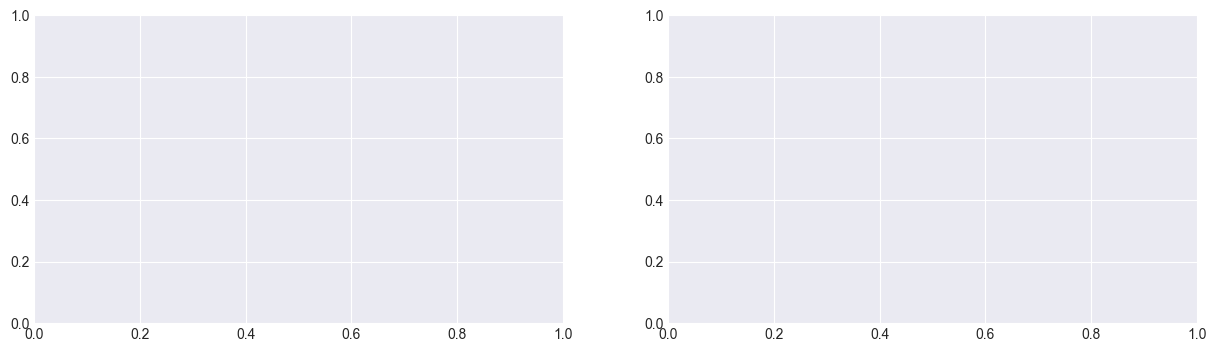

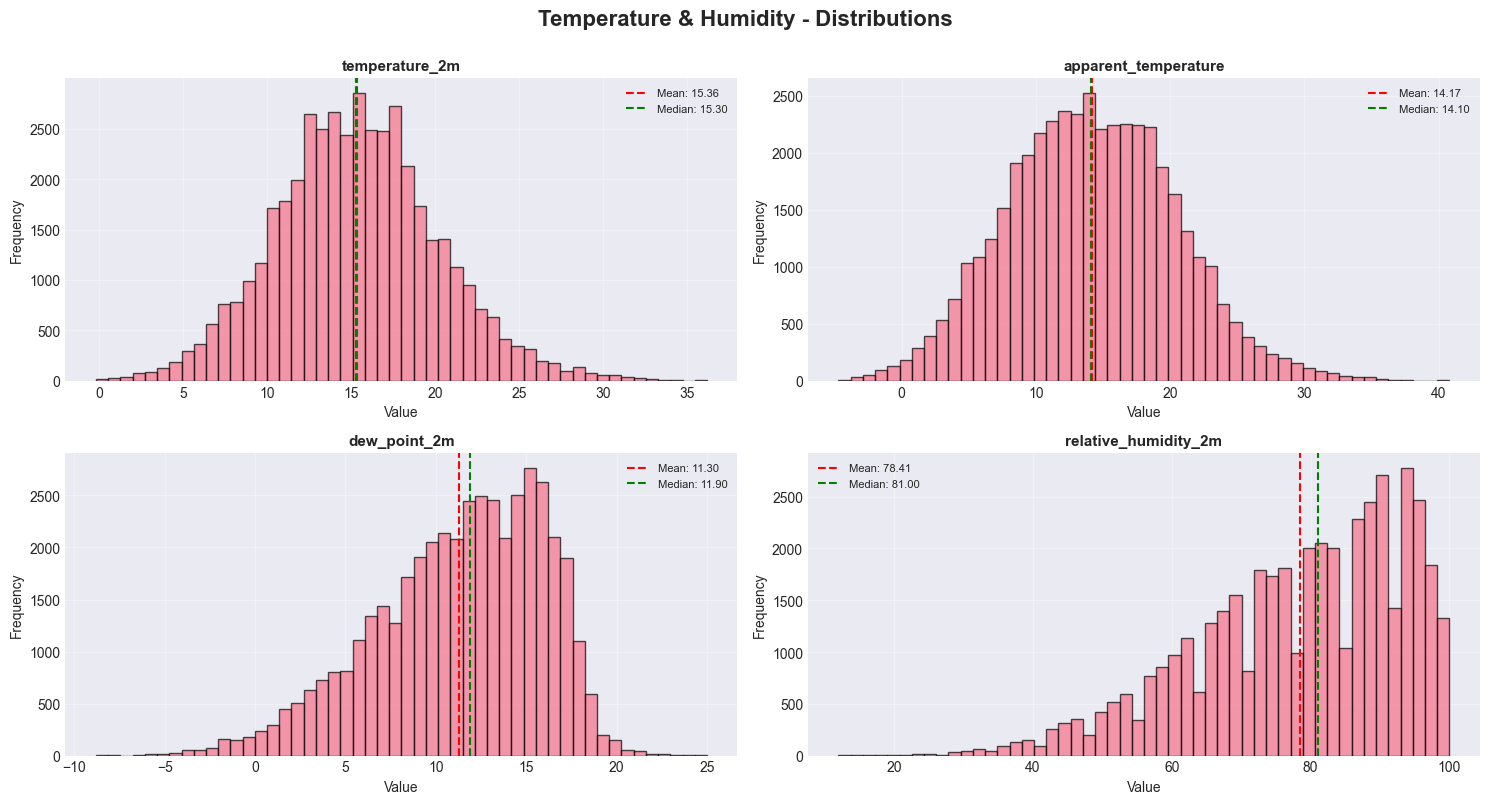

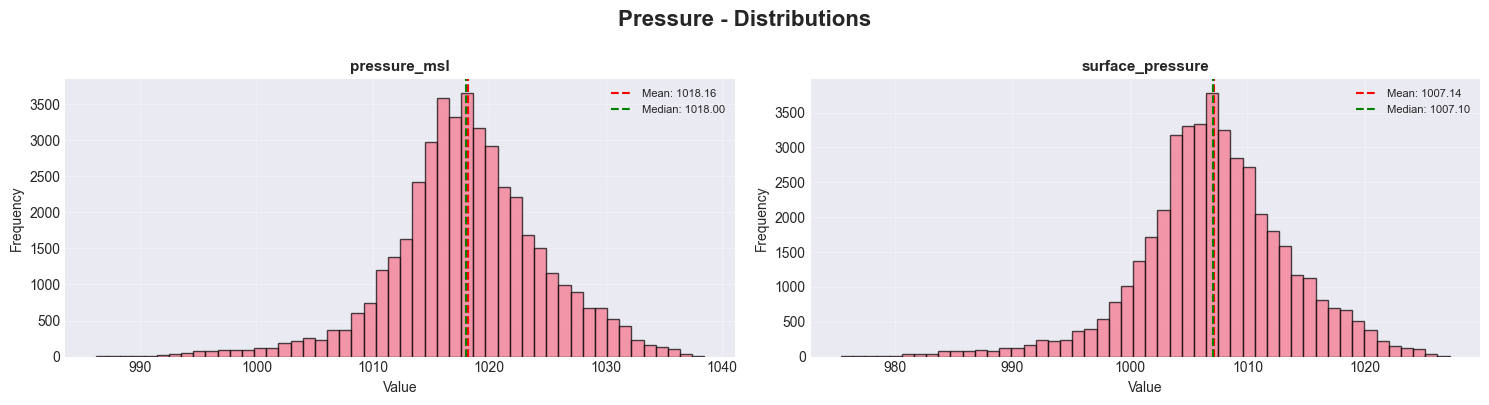

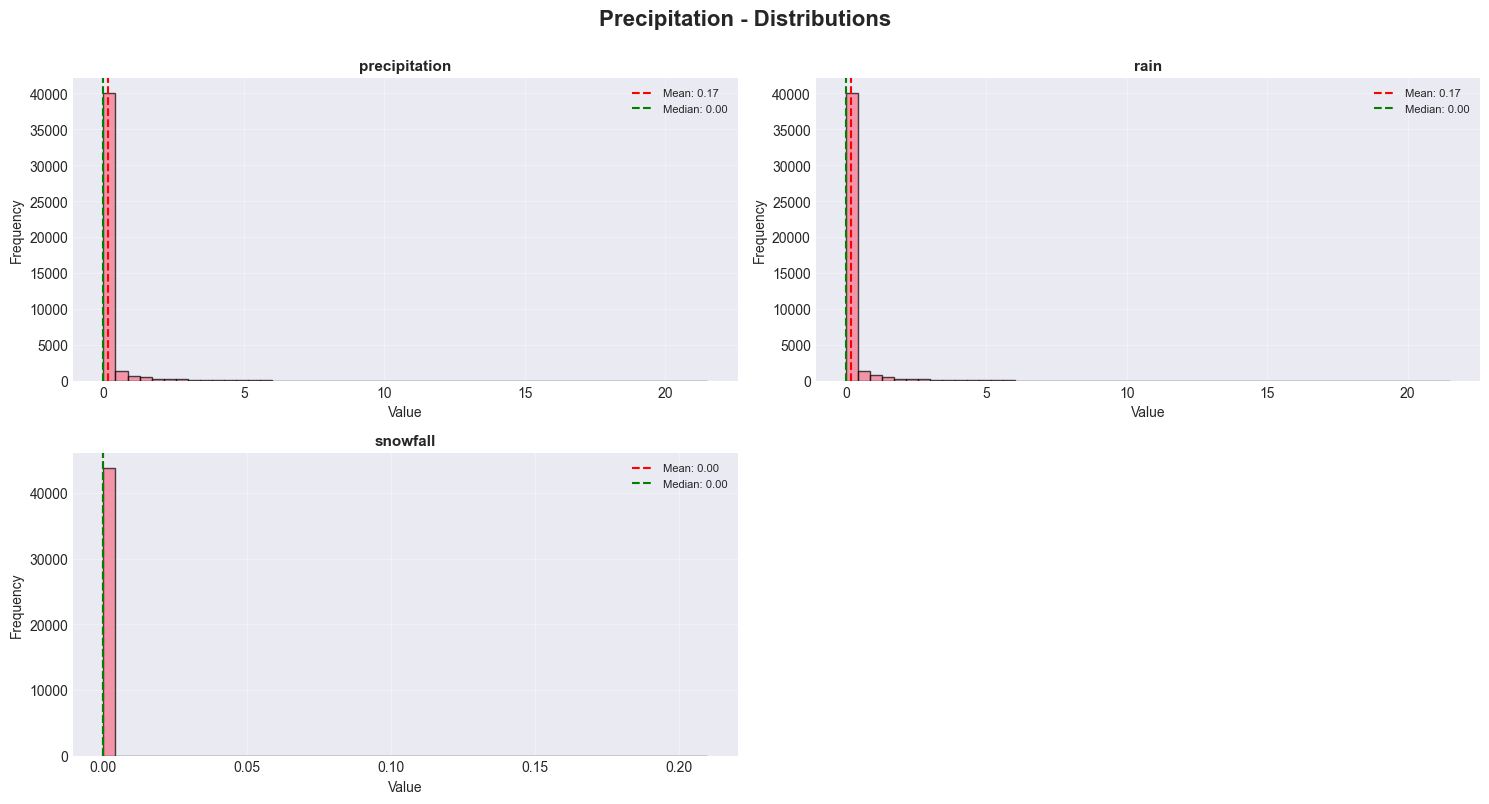

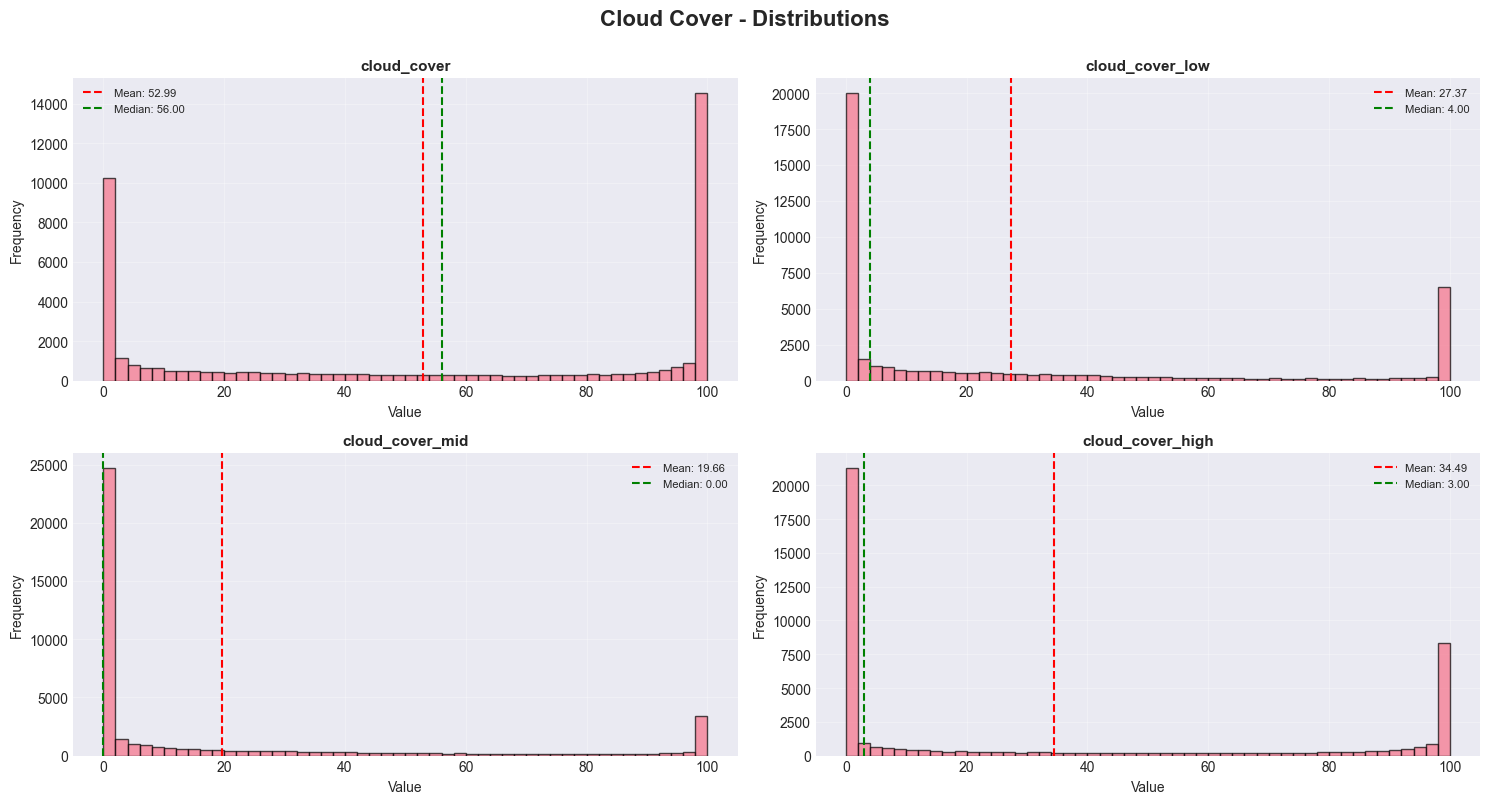

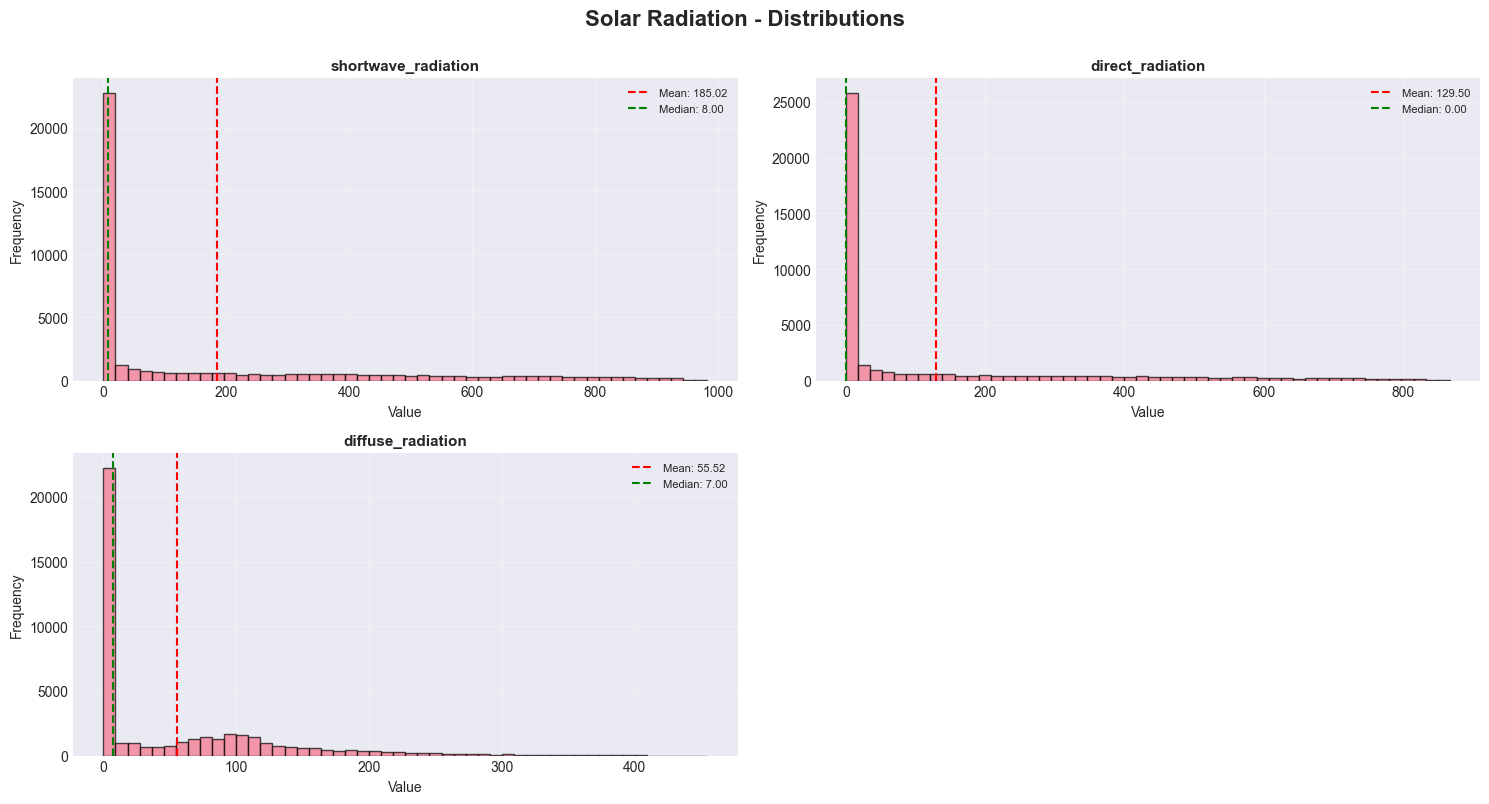

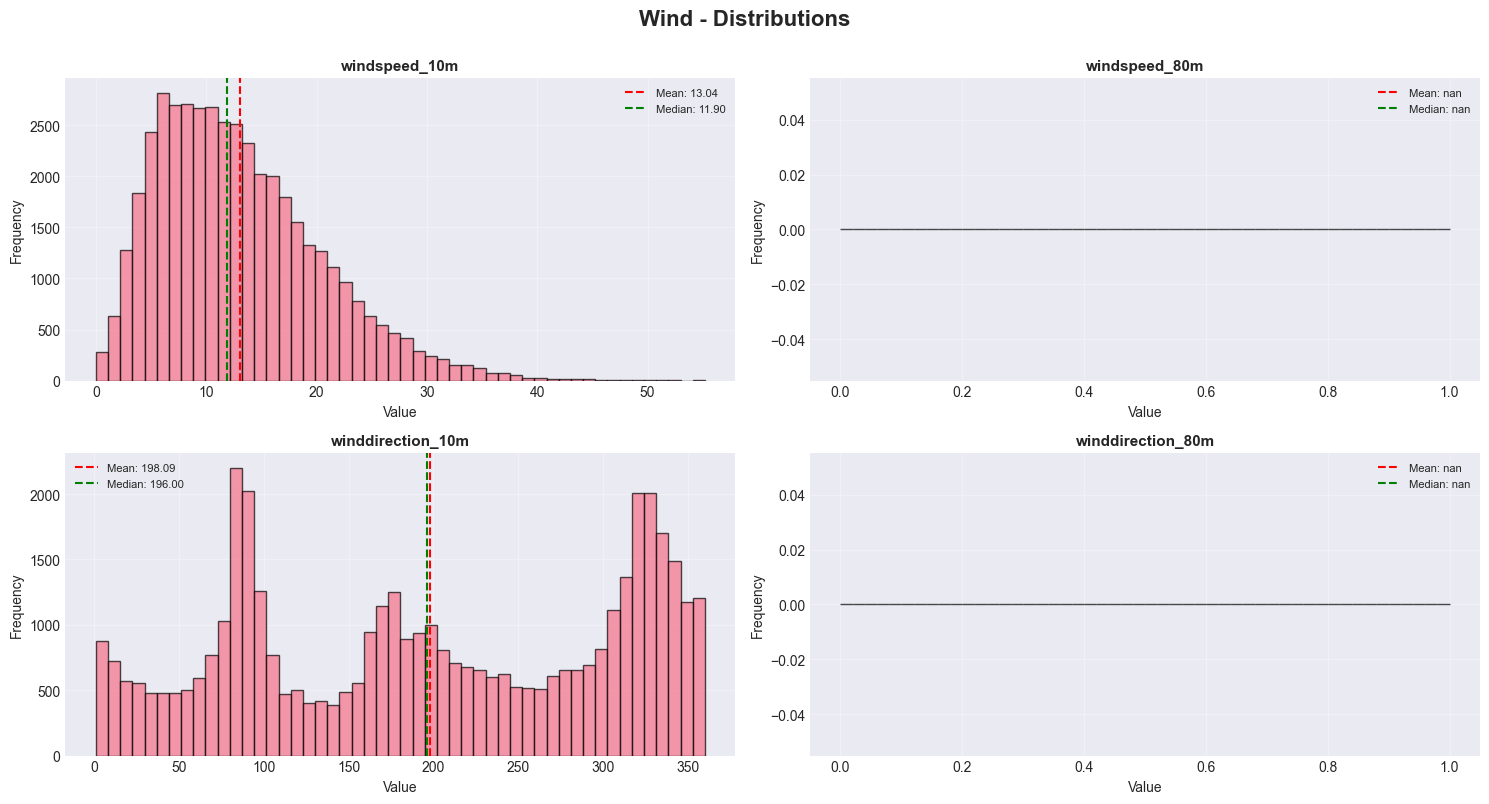

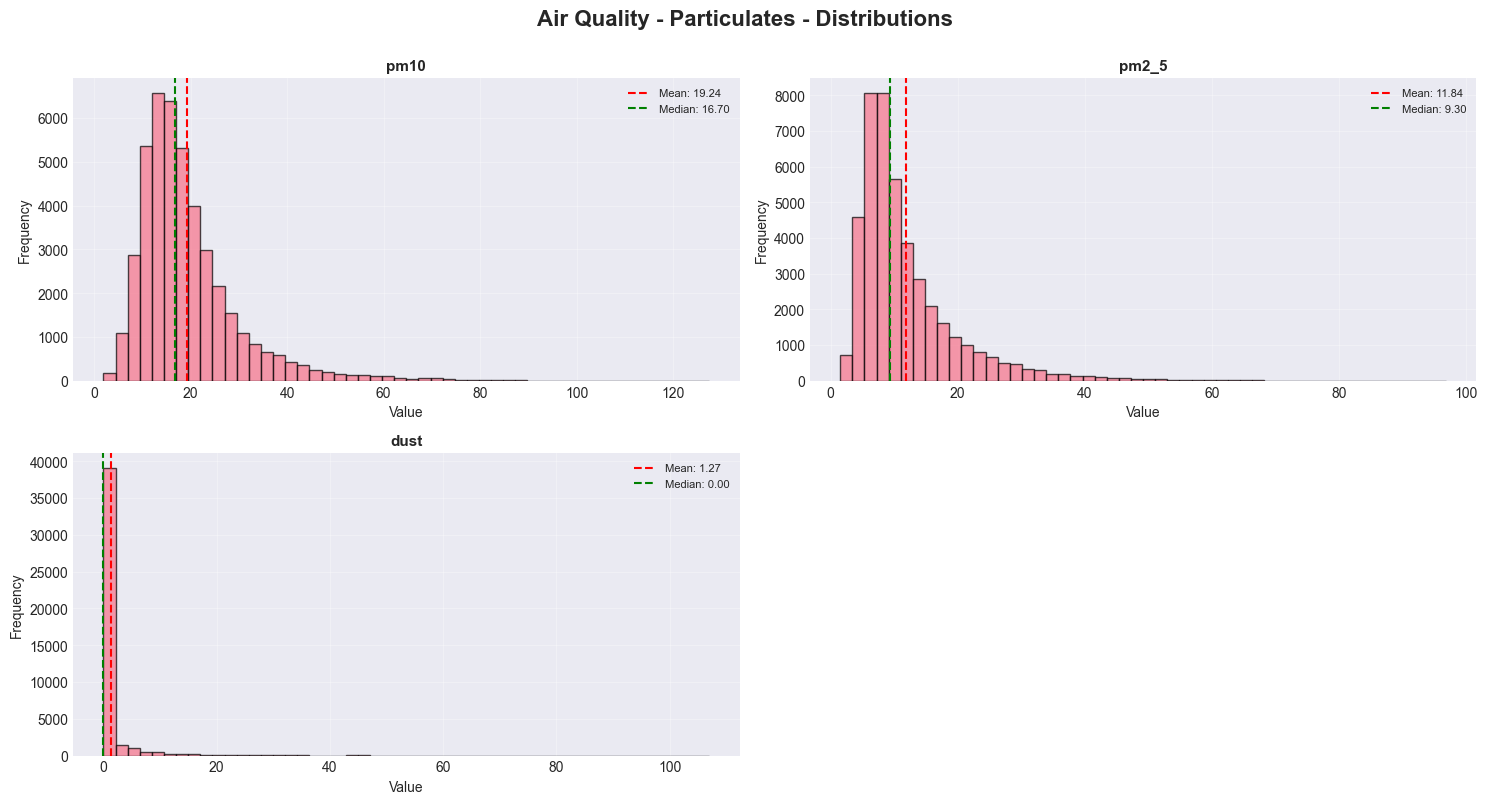

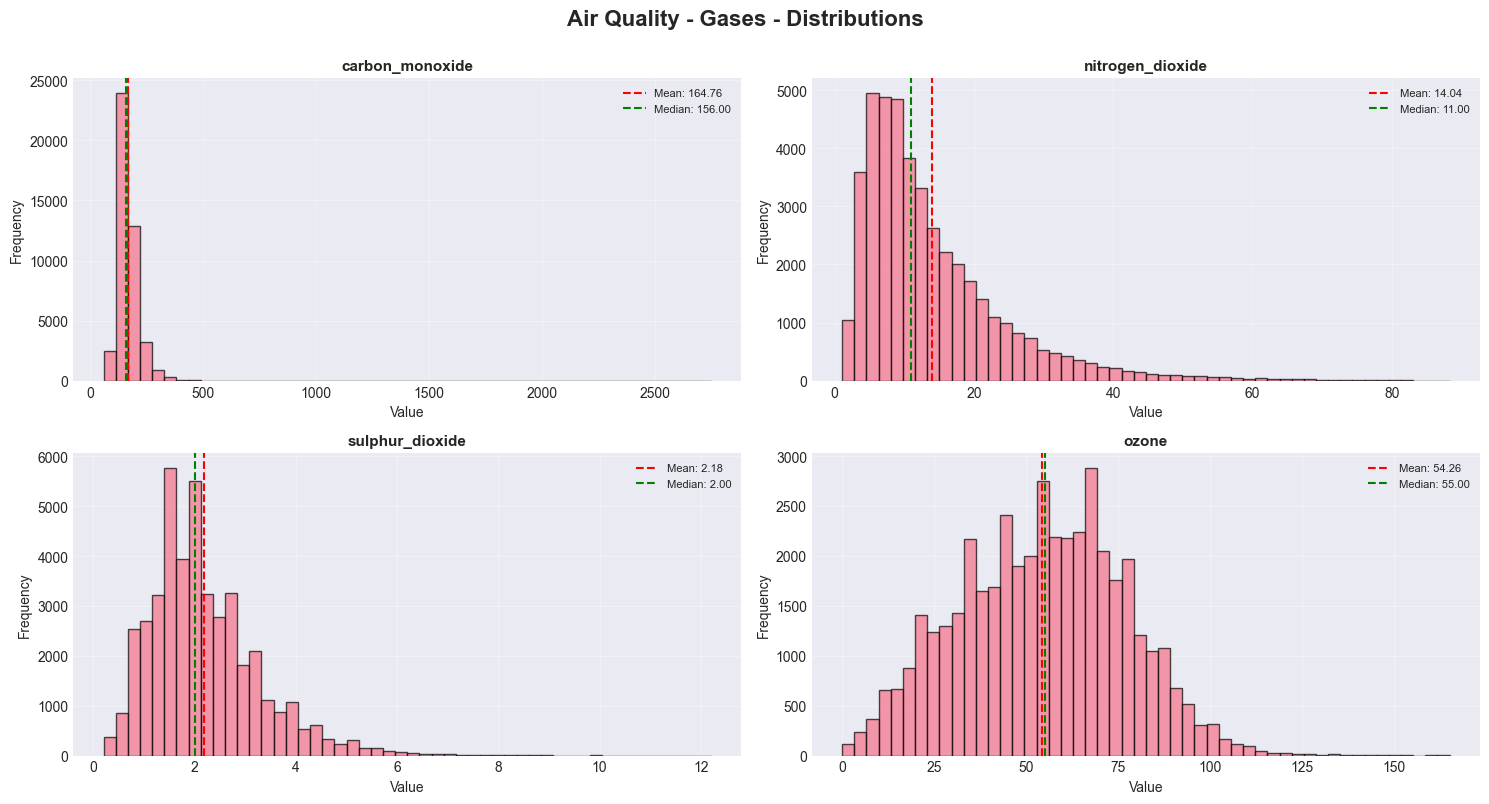

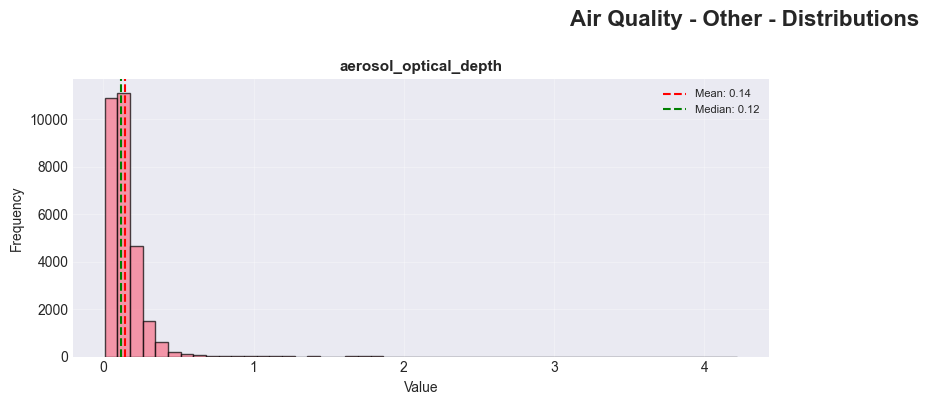

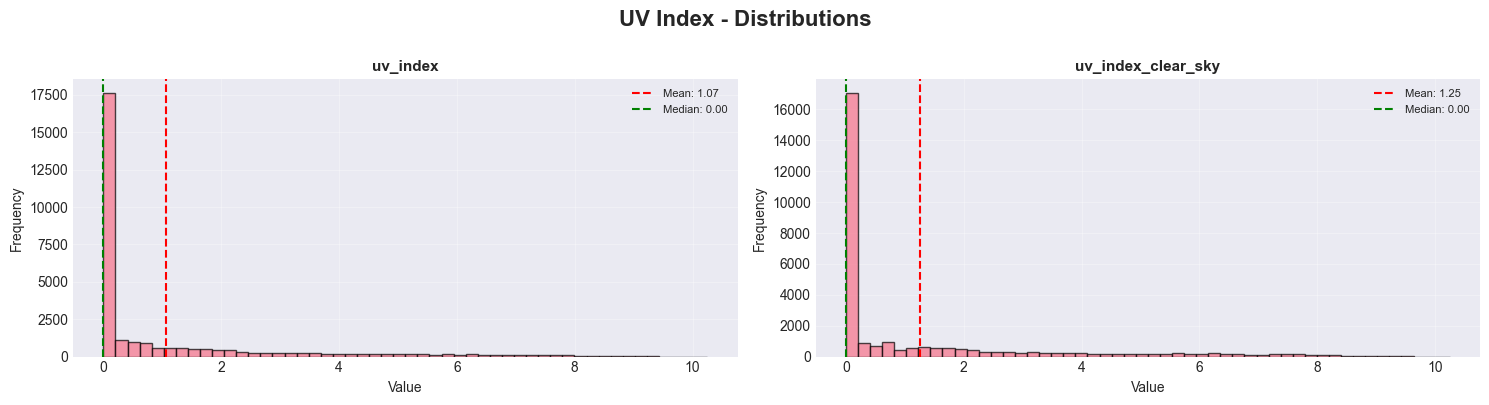

In [23]:
# Plot distributions for each category
for category, variables in var_groups.items():
    plot_distributions(df, variables, category)

## 6. Time Series Plots by Category

In [24]:
# Function to plot time series
def plot_timeseries(data, variables, category_name, sample_year='2024'):
    """
    Plot time series for a group of variables (1 year sample)
    """
    n_vars = len(variables)
    
    fig, axes = plt.subplots(n_vars, 1, figsize=(16, 3*n_vars))
    axes = [axes] if n_vars == 1 else axes
    
    for idx, var in enumerate(variables):
        ax = axes[idx]
        
        # Plot one year of data
        data_subset = data[var][sample_year]
        ax.plot(data_subset.index, data_subset.values, linewidth=0.5, alpha=0.7)
        ax.set_title(f'{var} - Year {sample_year}', fontsize=11, fontweight='bold')
        ax.set_ylabel('Value')
        ax.grid(True, alpha=0.3)
        
        if idx == n_vars - 1:
            ax.set_xlabel('Date')
    
    plt.suptitle(f'{category_name} - Time Series (Year {sample_year})', fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

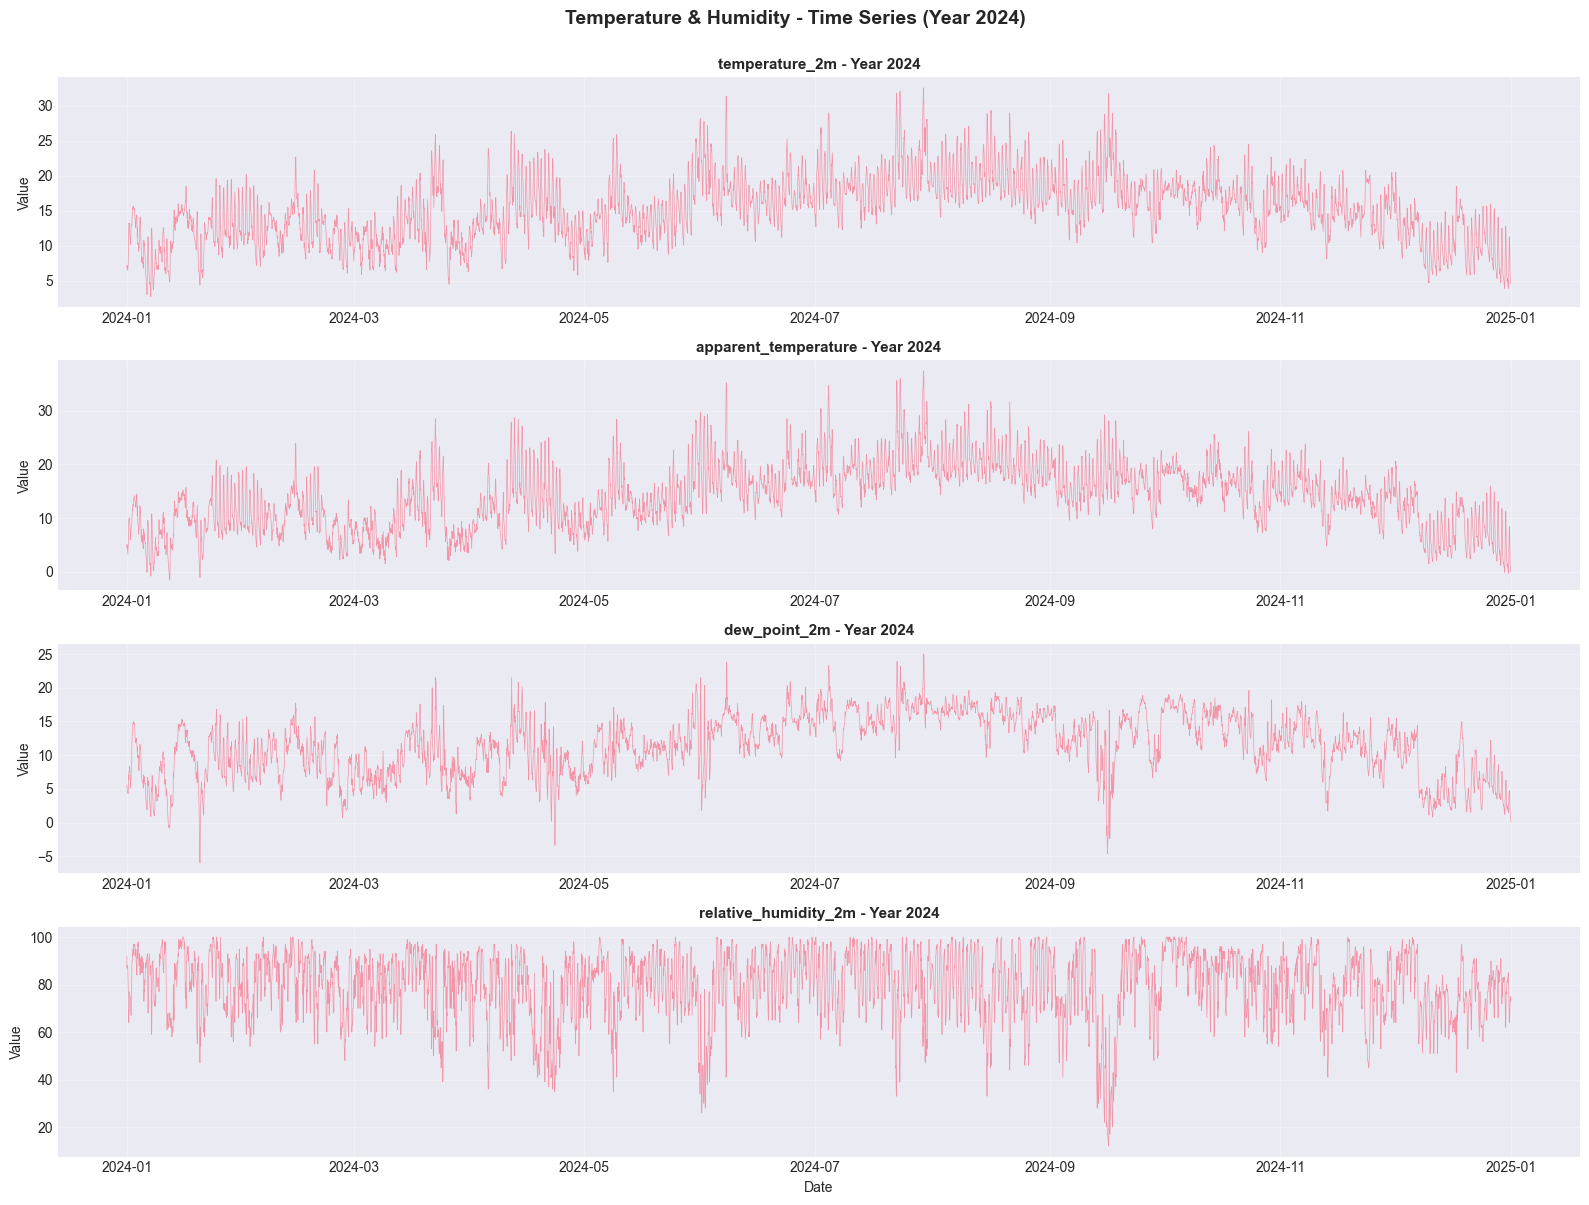

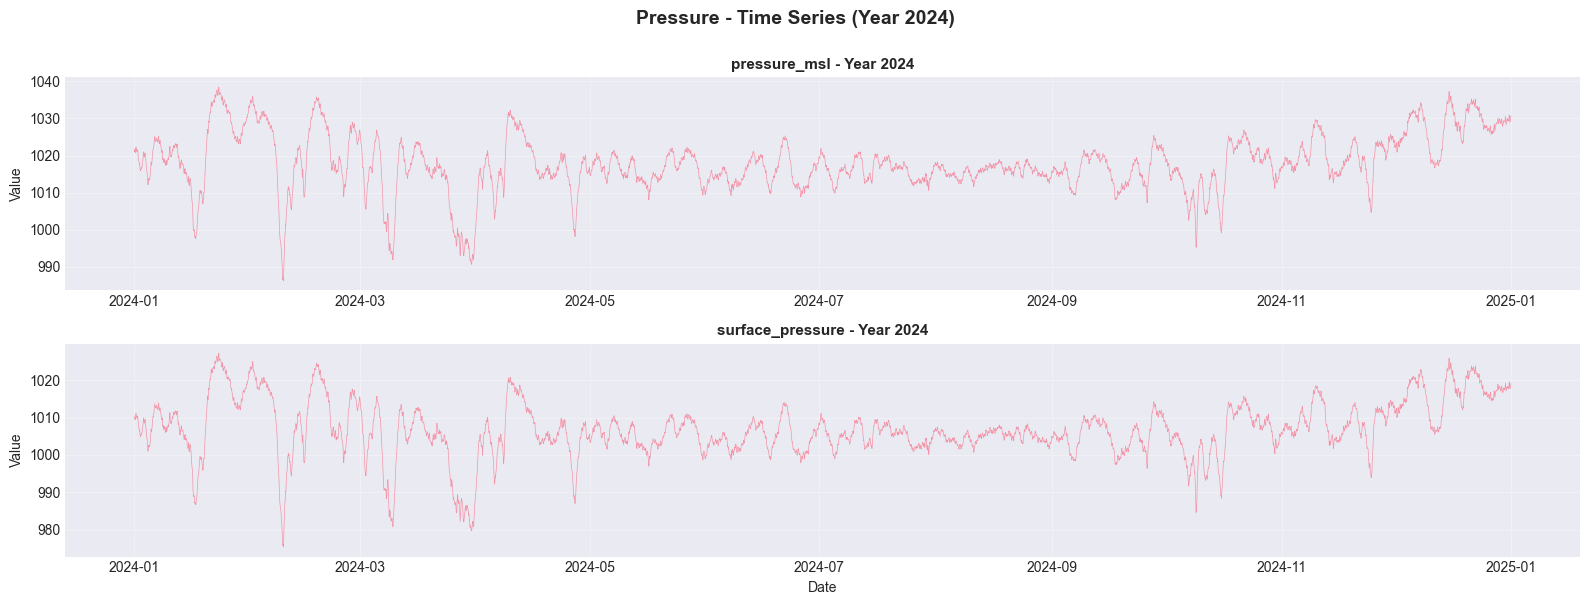

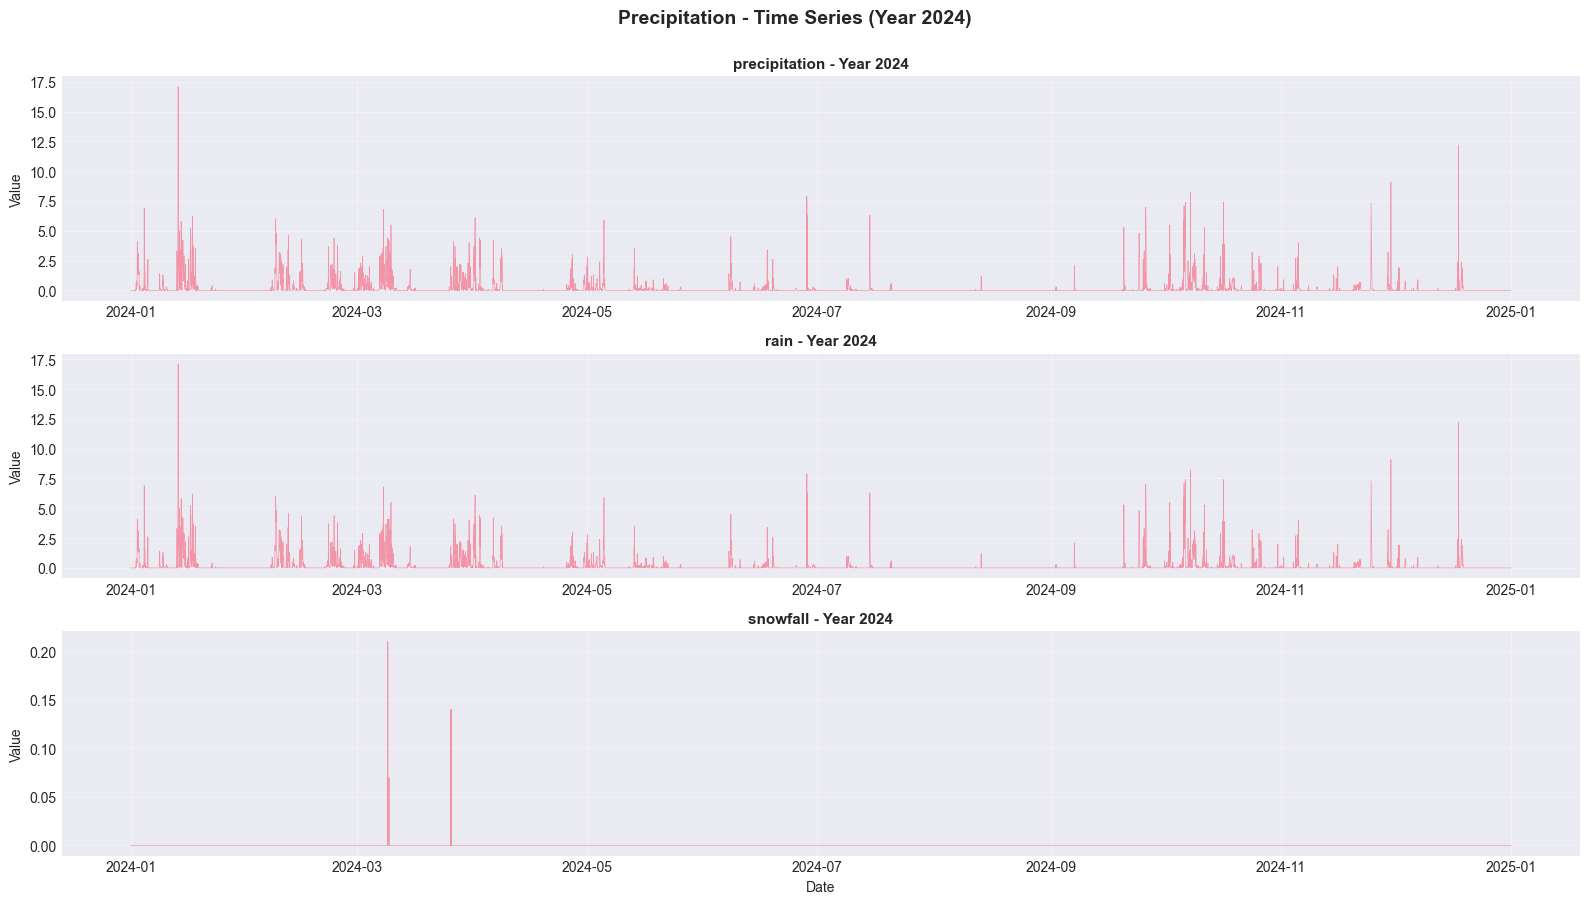

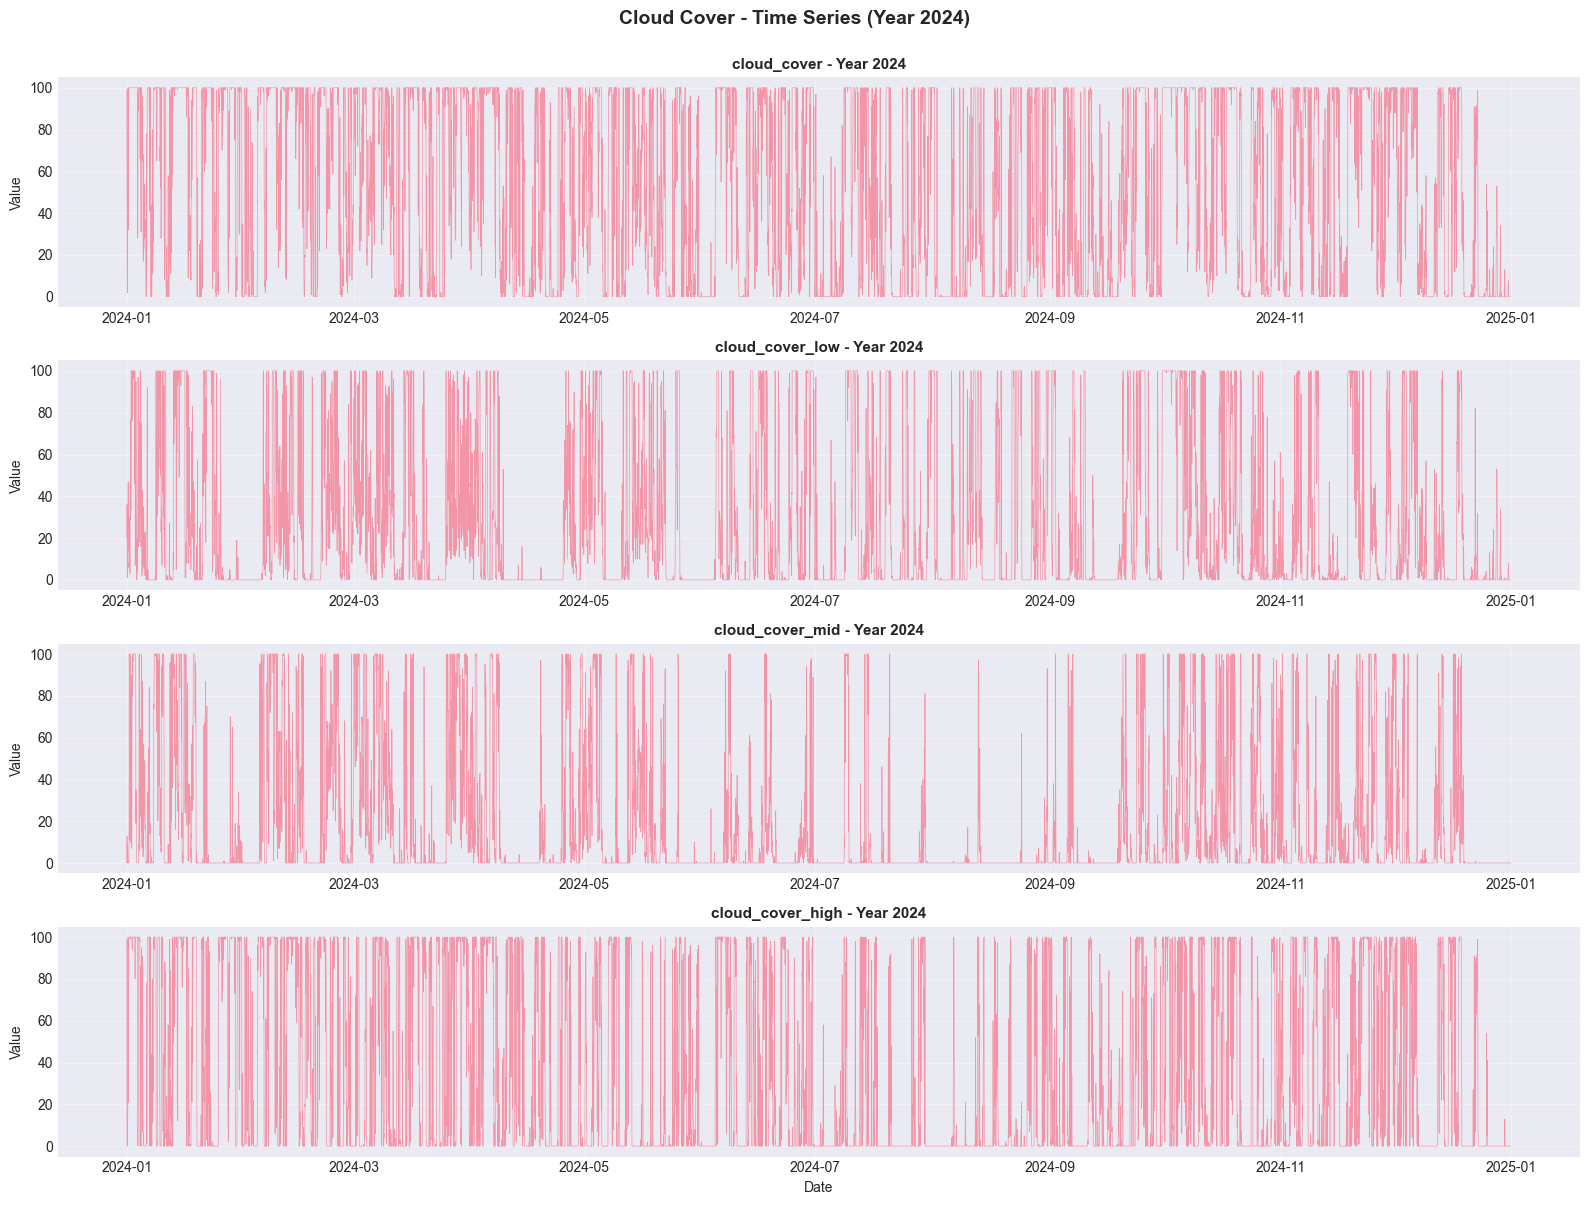

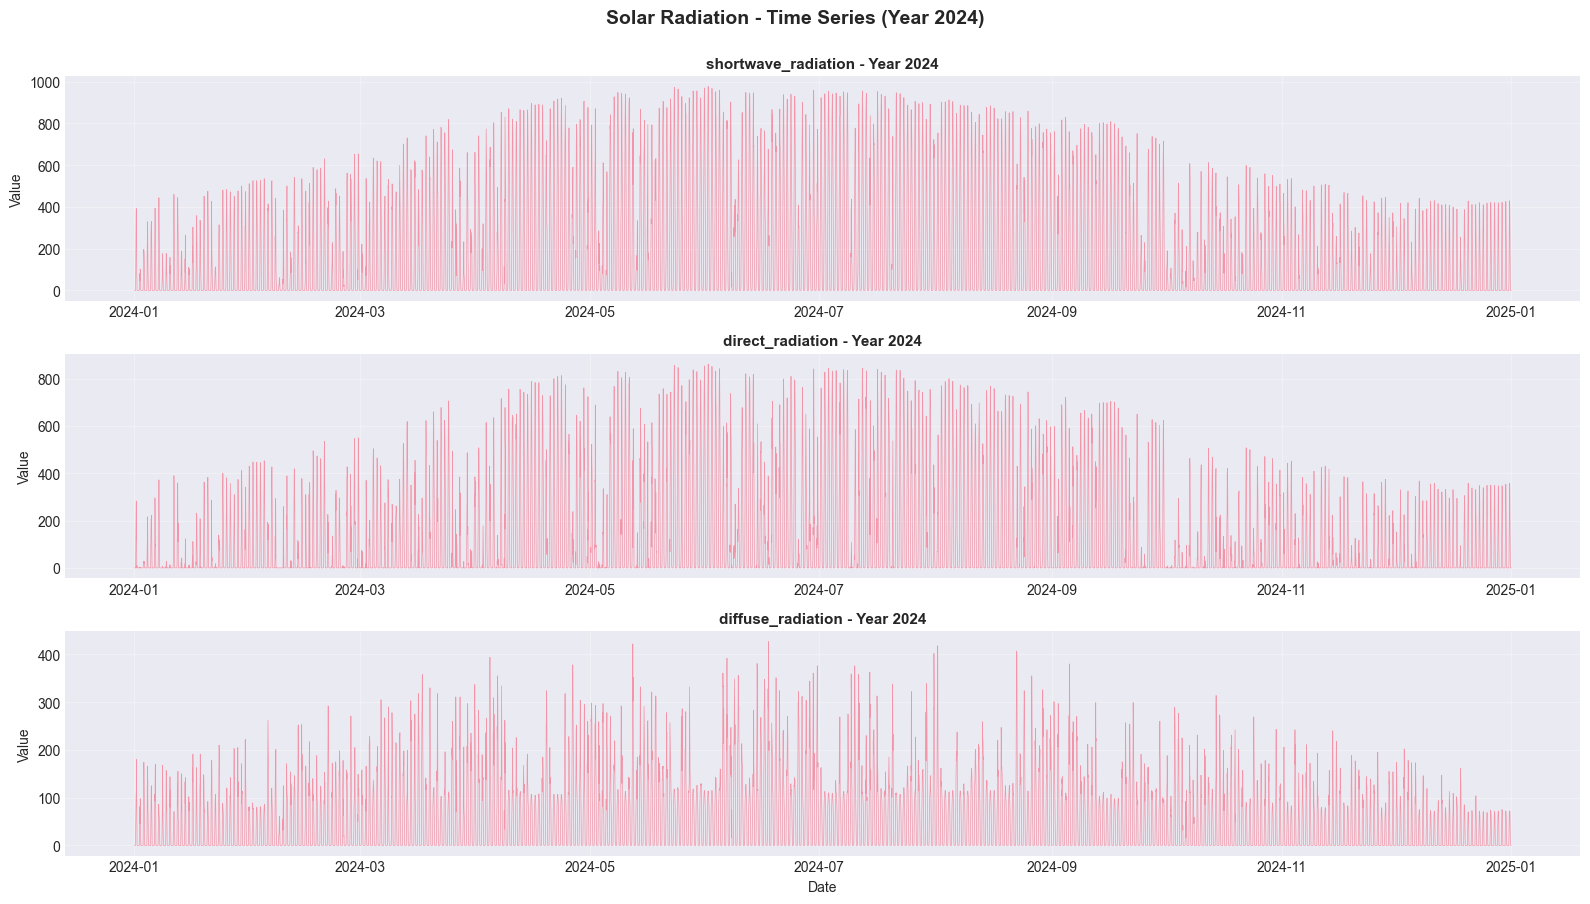

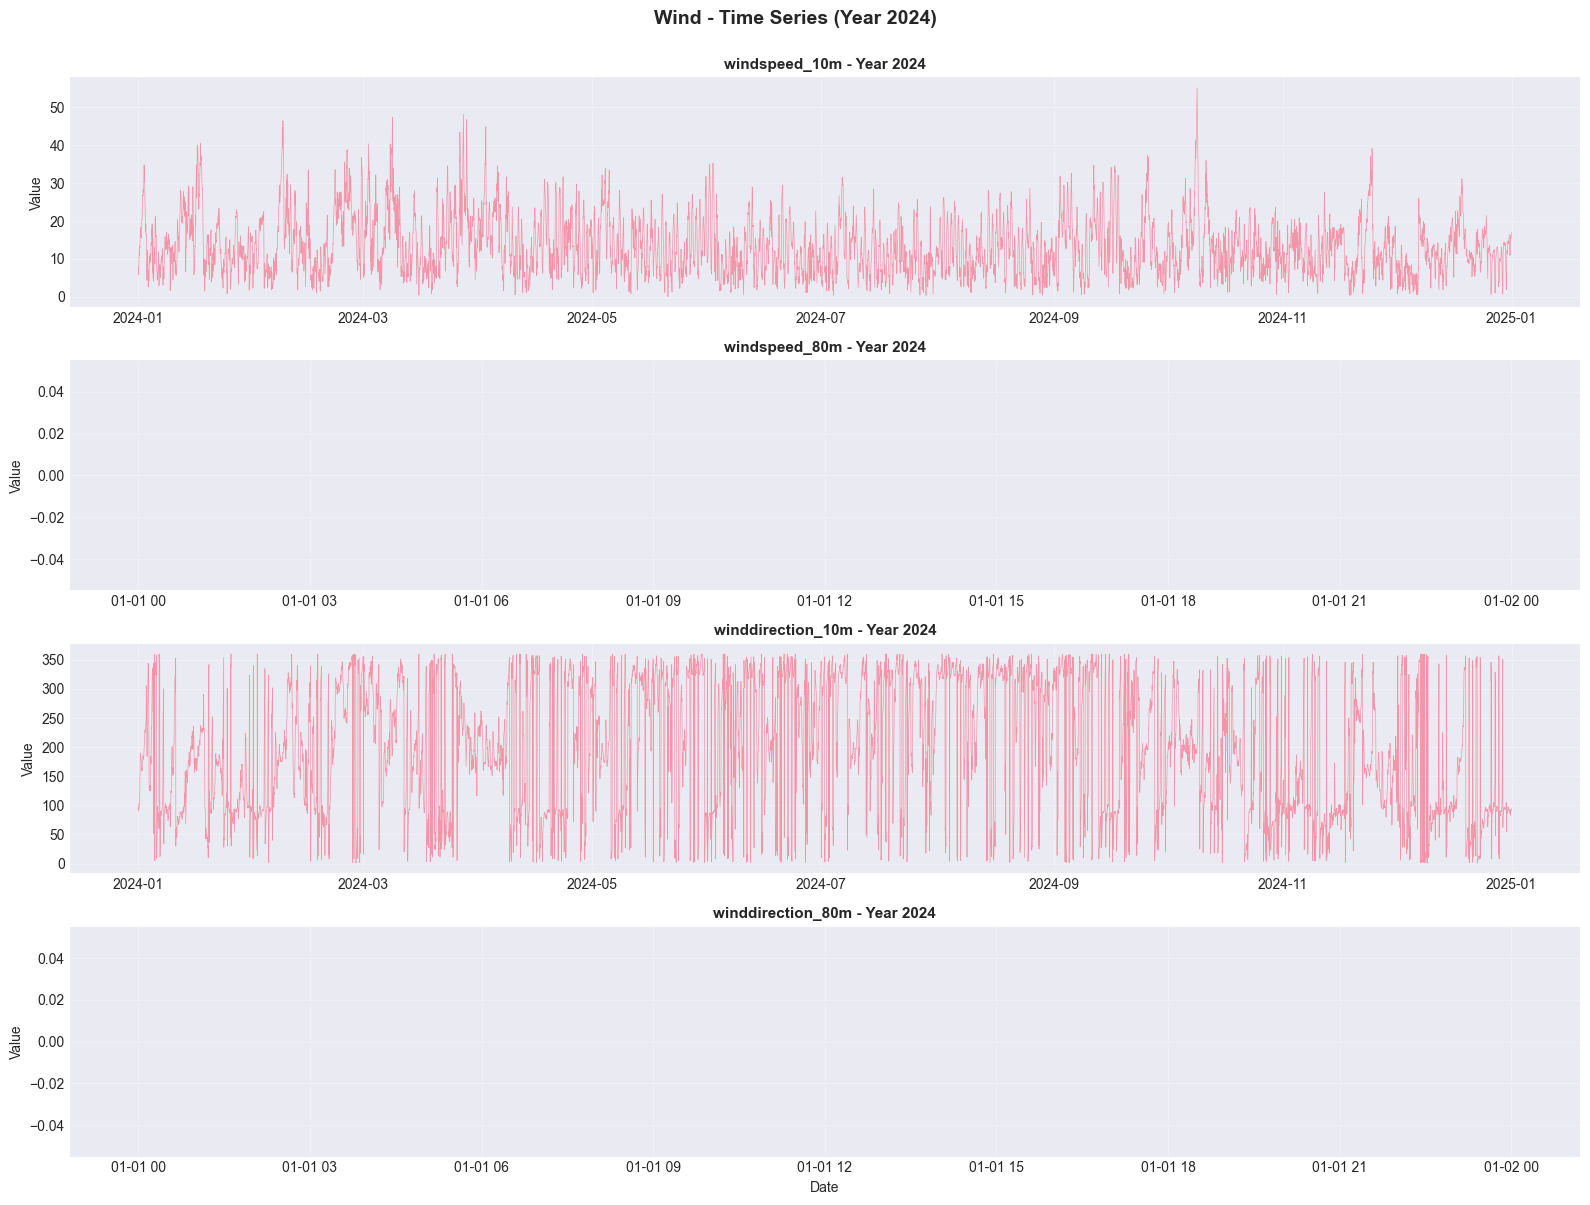

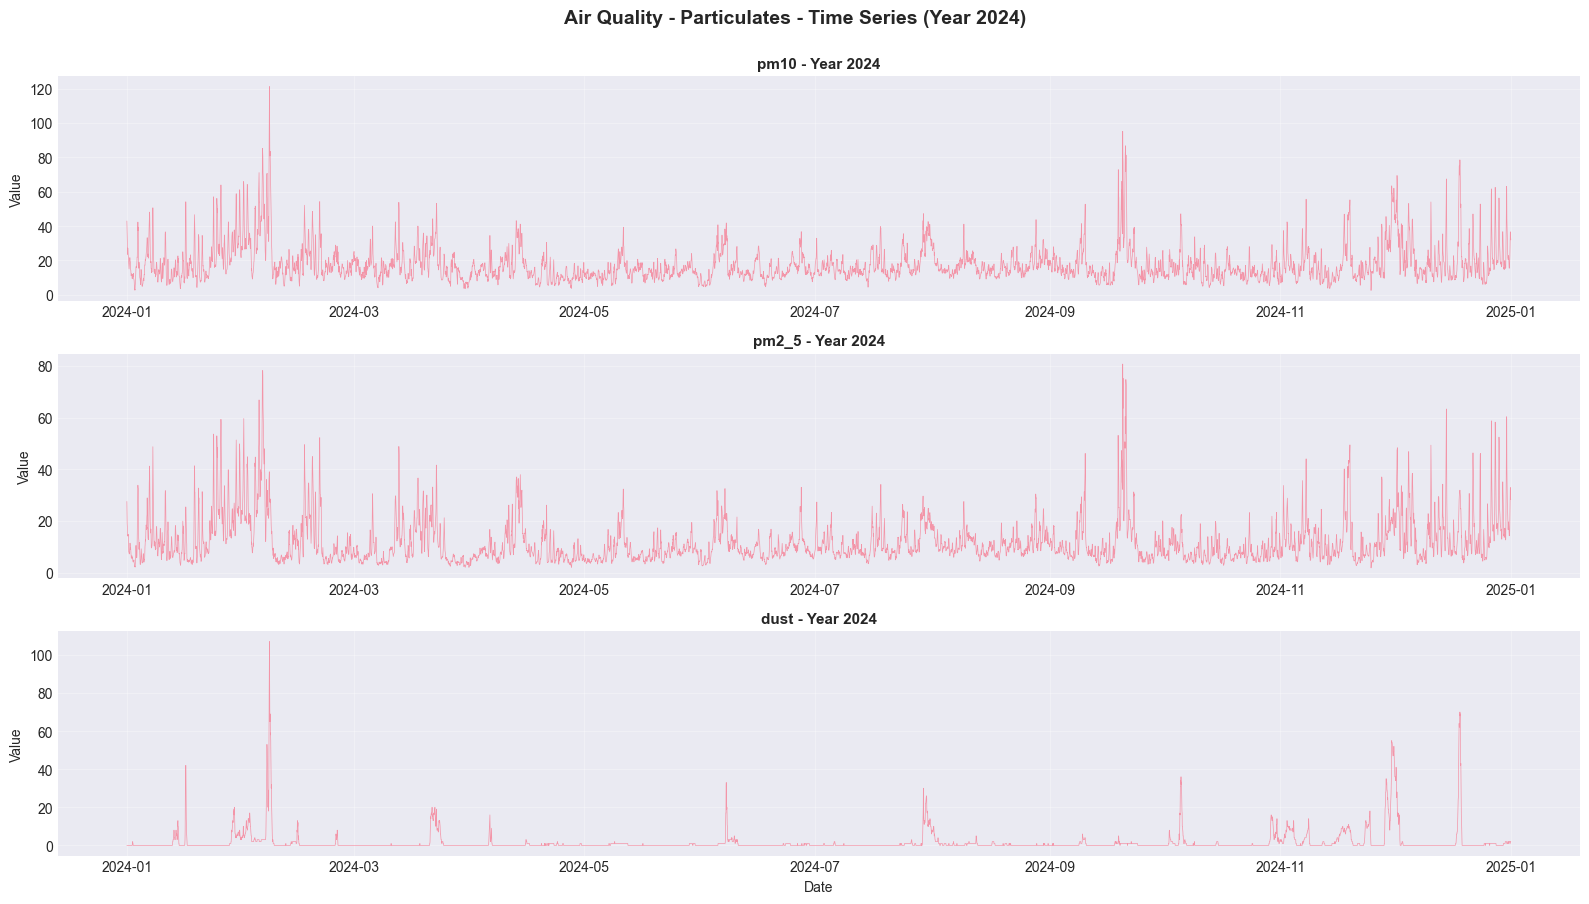

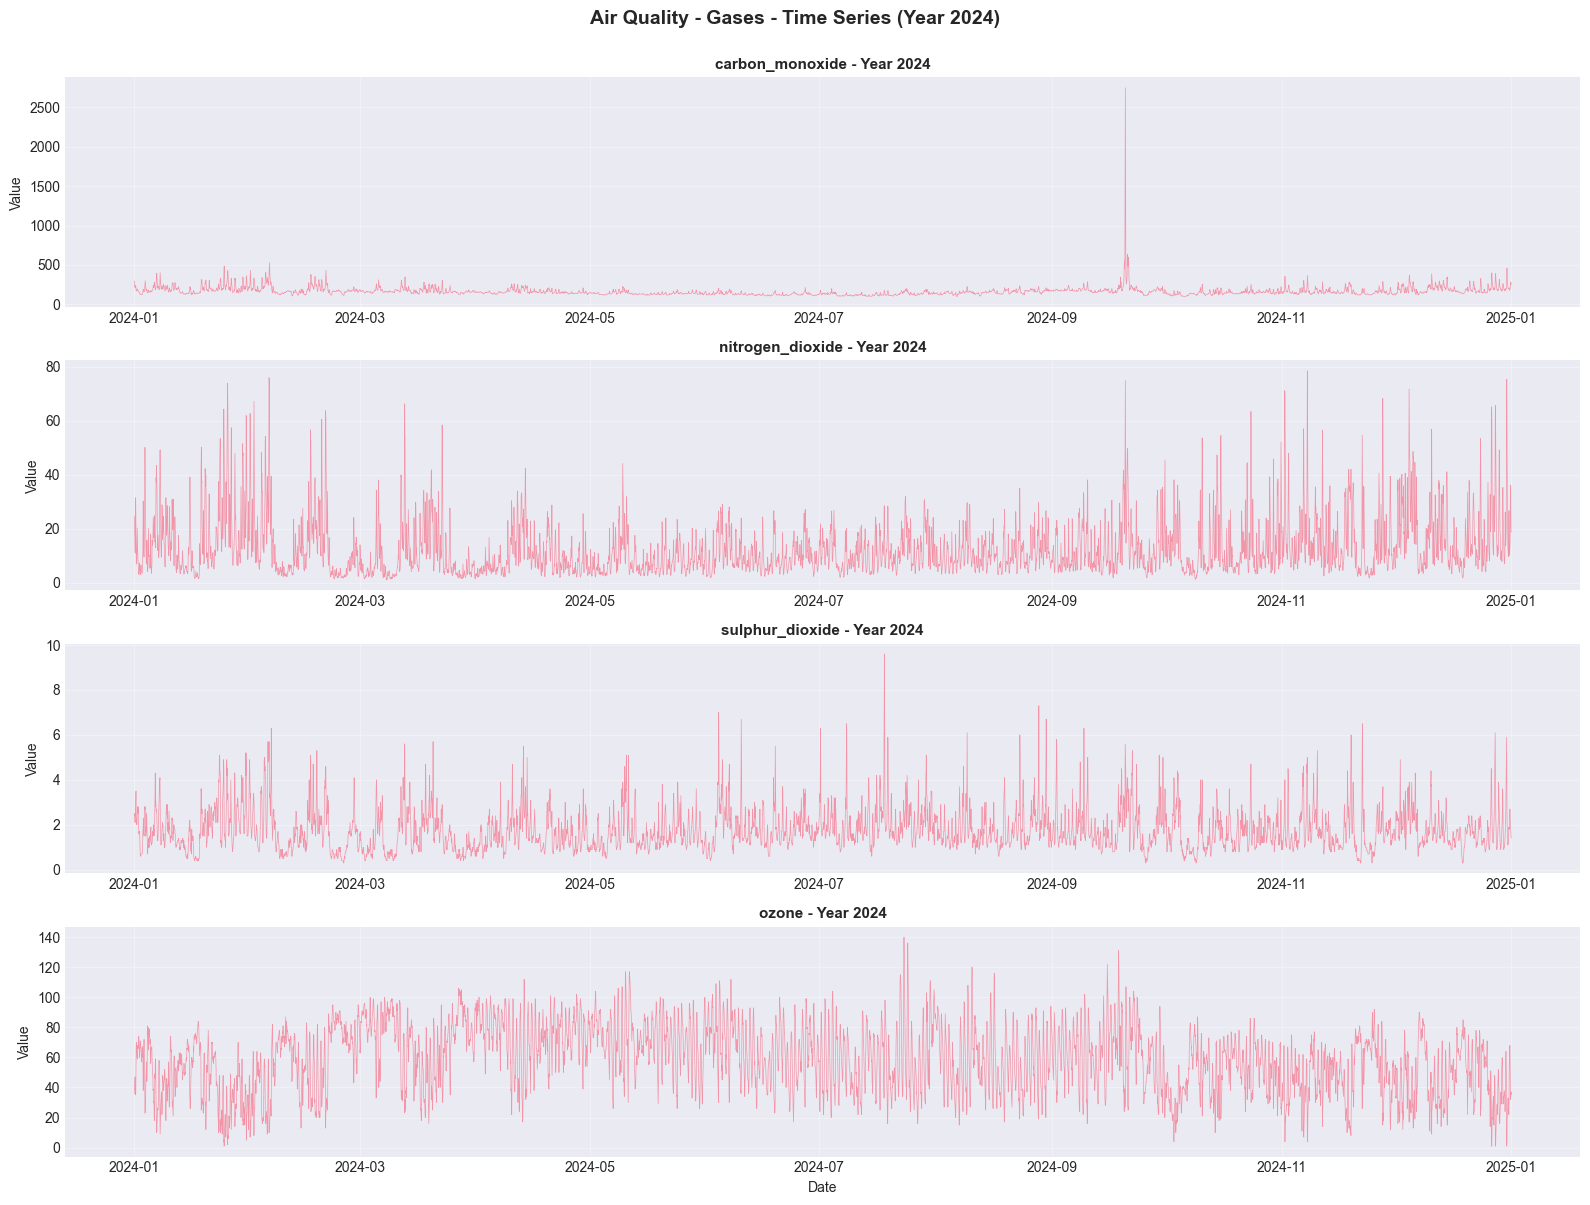

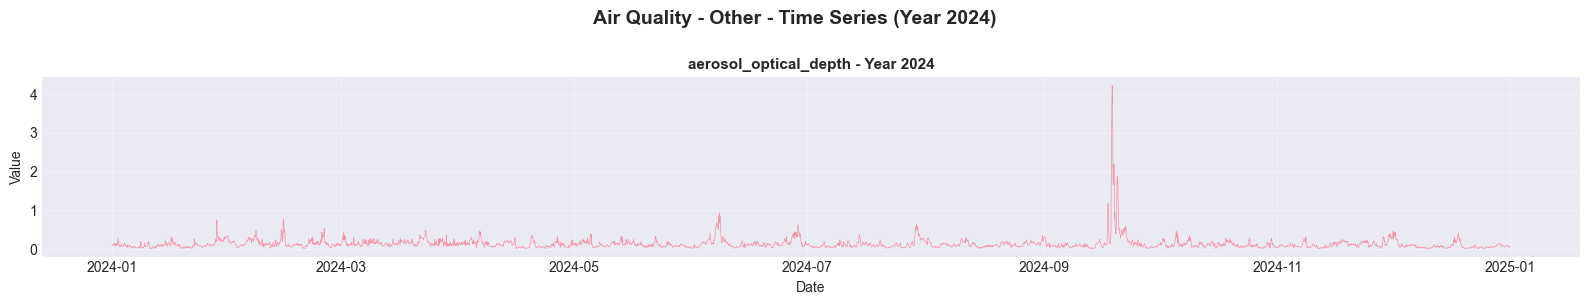

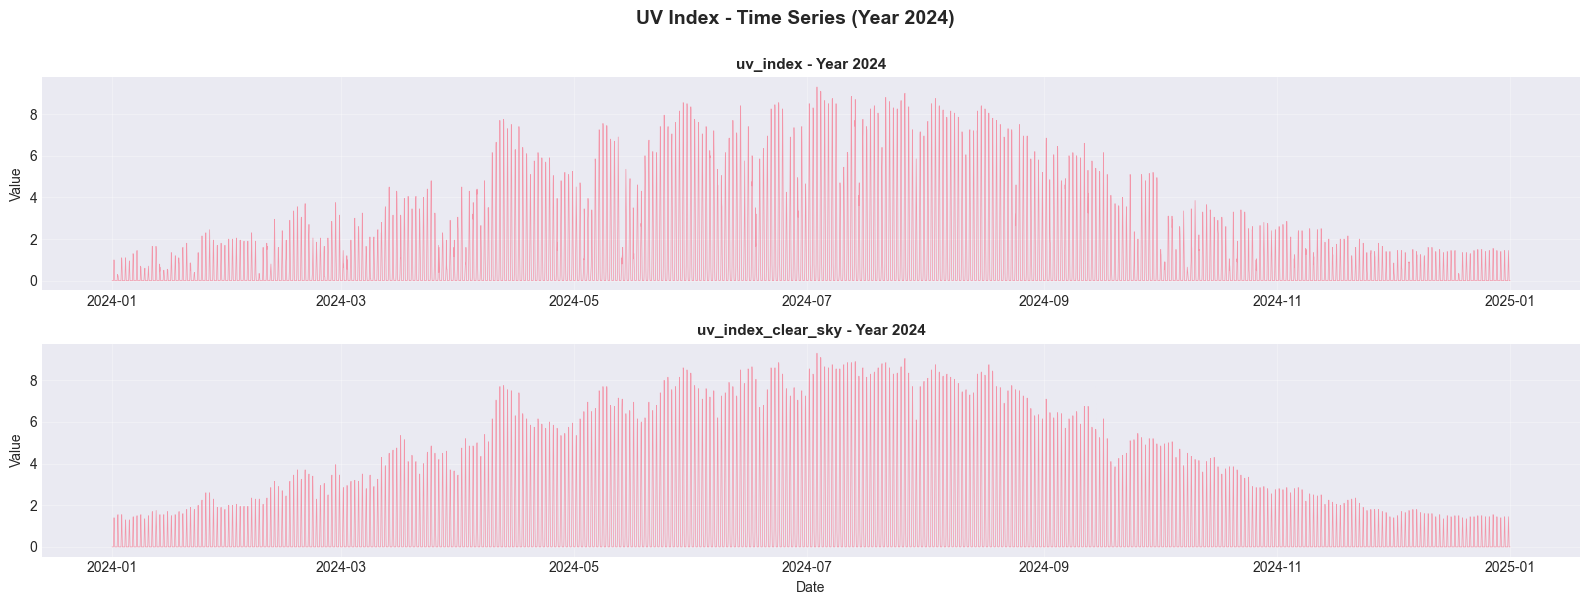

In [25]:
# Plot time series for each category
for category, variables in var_groups.items():
    plot_timeseries(df, variables, category)

## 7. Correlation Analysis

### 7.1 Full Correlation Matrix

In [26]:
# Calculate correlation matrix
corr_matrix = df.corr()

print(f"Correlation matrix shape: {corr_matrix.shape}")
print(f"Analyzing {corr_matrix.shape[0]} variables")

Correlation matrix shape: (30, 30)
Analyzing 30 variables


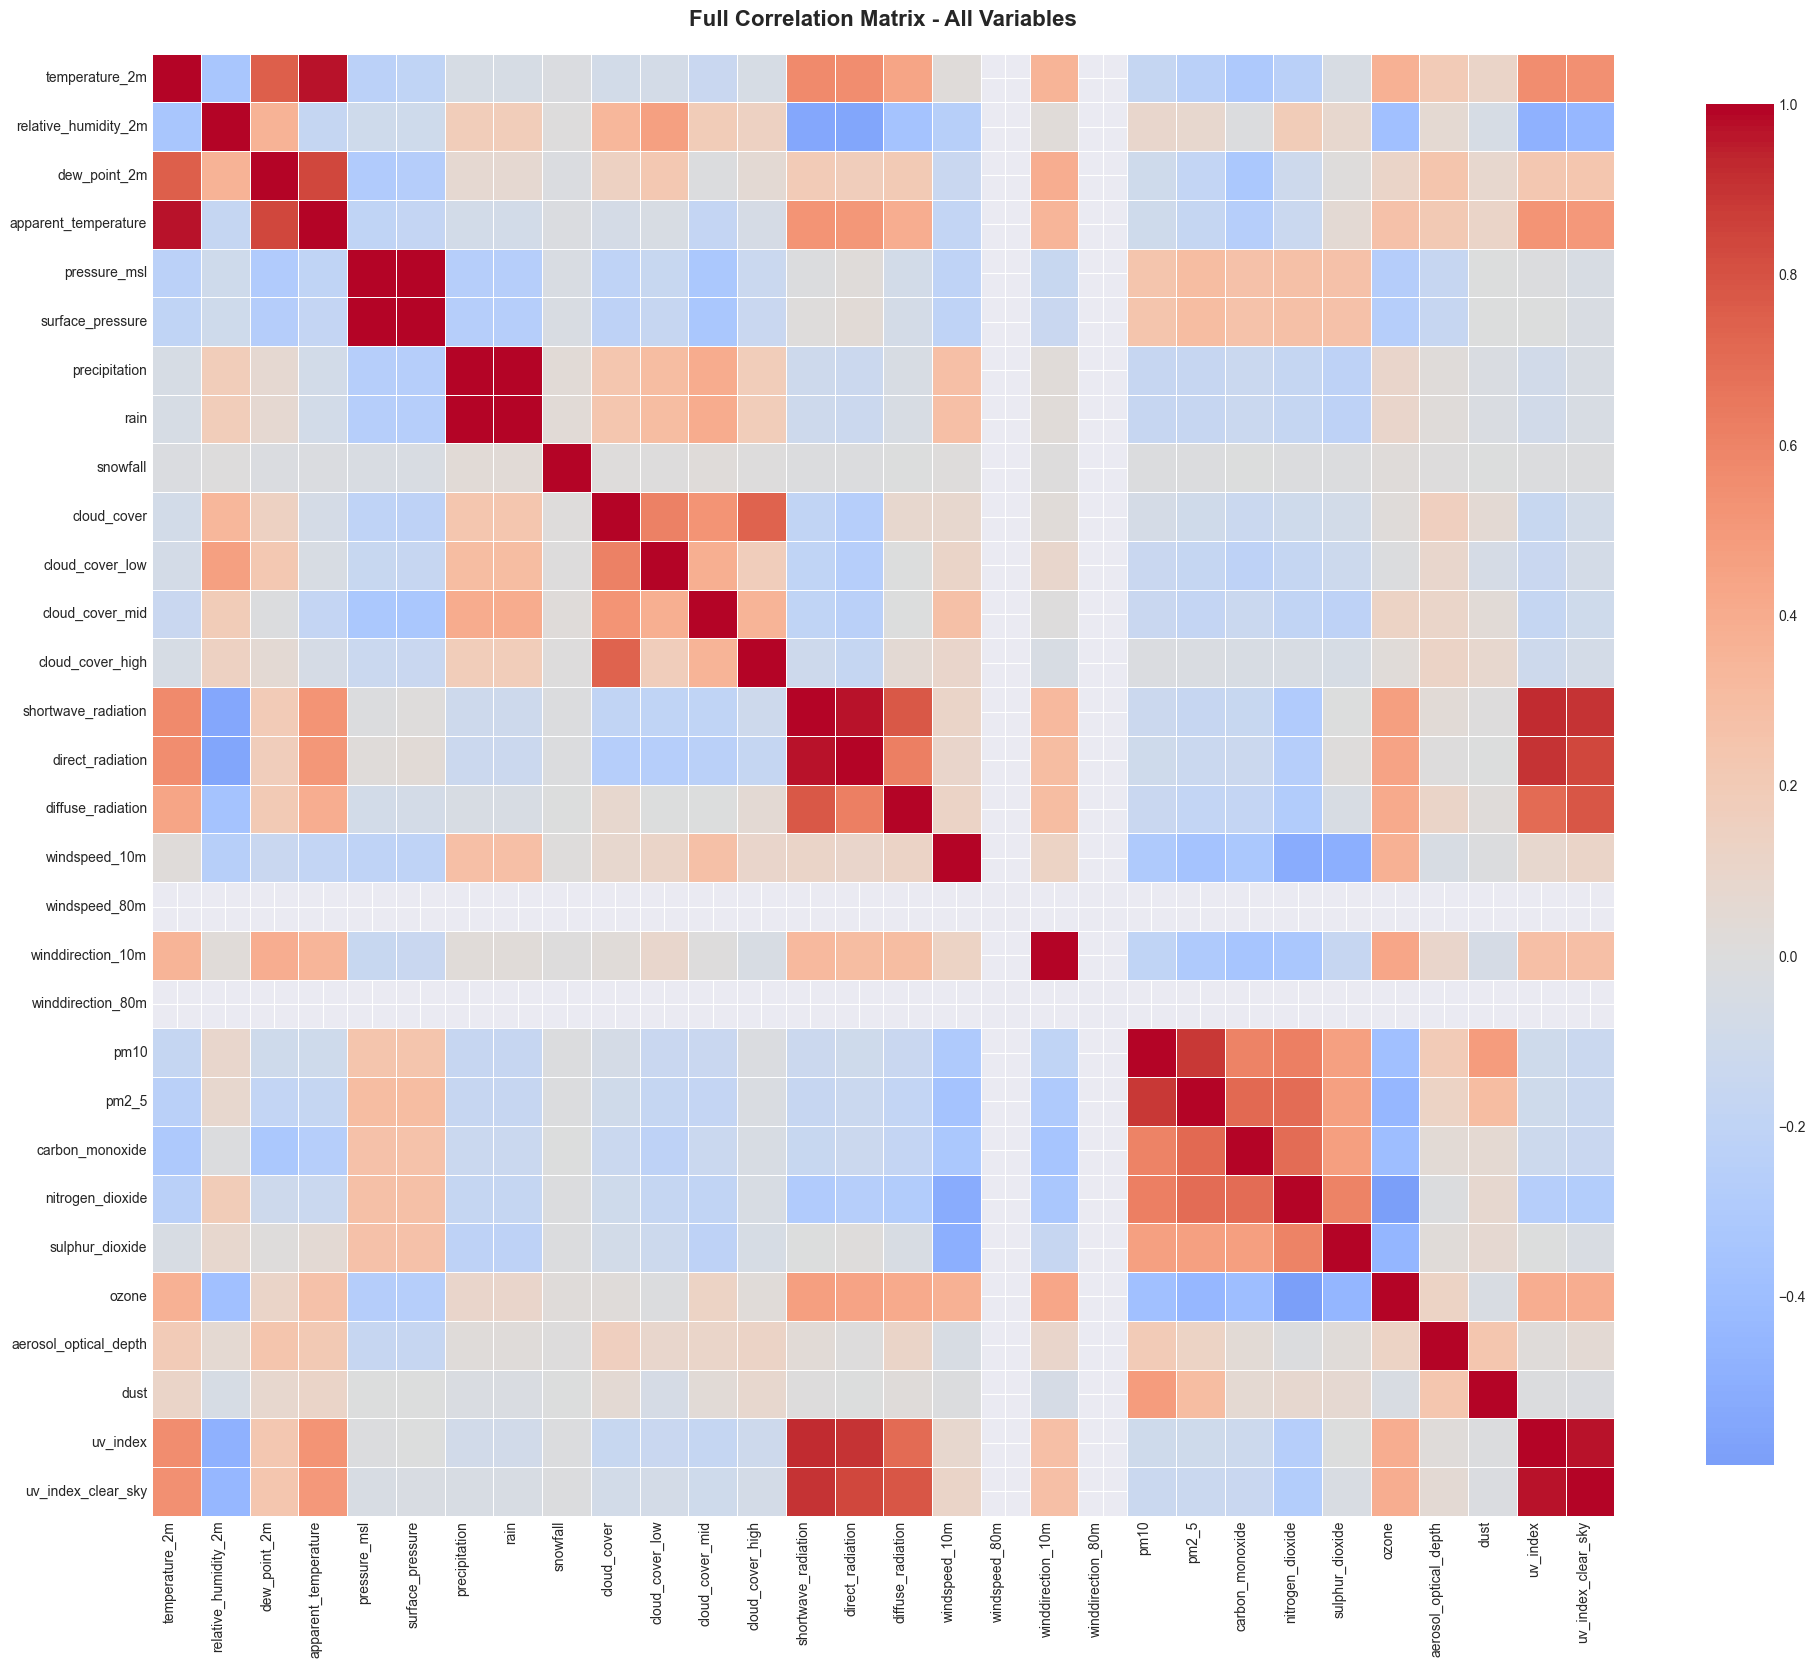

In [27]:
# Plot full correlation matrix
fig, ax = plt.subplots(figsize=(20, 18))

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=False,  # Too many variables for annotations
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            ax=ax)

ax.set_title('Full Correlation Matrix - All Variables', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 7.2 Strongest Correlations

In [28]:
# Find strongest correlations (excluding diagonal)
def get_top_correlations(corr_matrix, n=20):
    """
    Extract top N absolute correlations (excluding diagonal)
    """
    # Get upper triangle (avoid duplicates)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    corr_pairs = corr_matrix.where(mask).stack().reset_index()
    corr_pairs.columns = ['Variable_1', 'Variable_2', 'Correlation']
    
    # Sort by absolute correlation
    corr_pairs['Abs_Correlation'] = corr_pairs['Correlation'].abs()
    corr_pairs = corr_pairs.sort_values('Abs_Correlation', ascending=False)
    
    return corr_pairs.head(n)

top_corr = get_top_correlations(corr_matrix, n=30)

print("="*80)
print("TOP 30 STRONGEST CORRELATIONS")
print("="*80)
display(top_corr[['Variable_1', 'Variable_2', 'Correlation']].reset_index(drop=True))

TOP 30 STRONGEST CORRELATIONS


Variable_1            Variable_2  Correlation
0          precipitation                  rain        1.000
1           pressure_msl      surface_pressure        1.000
2    shortwave_radiation      direct_radiation        0.975
3               uv_index    uv_index_clear_sky        0.970
4         temperature_2m  apparent_temperature        0.970
5    shortwave_radiation              uv_index        0.920
6       direct_radiation              uv_index        0.899
7    shortwave_radiation    uv_index_clear_sky        0.899
8                   pm10                 pm2_5        0.884
9       direct_radiation    uv_index_clear_sky        0.843
10          dew_point_2m  apparent_temperature        0.838
11     diffuse_radiation    uv_index_clear_sky        0.786
12   shortwave_radiation     diffuse_radiation        0.774
13        temperature_2m          dew_point_2m        0.752
14           cloud_cover      cloud_cover_high        0.737
15                 pm2_5       carbon_monoxide        0.714
16     diffuse_radiation              uv_index        0.706
17       carbon_monoxide      nitrogen_dioxide        0.700
18                 pm2_5      nitrogen_dioxide        0.696
19                  pm10      nitrogen_dioxide        0.619
20      direct_radiation     diffuse_radiation        0.614
21           cloud_cover       cloud_cover_low        0.612
22      nitrogen_dioxide       sulphur_dioxide        0.604
23                  pm10       carbon_monoxide        0.602
24      nitrogen_dioxide                 ozone       -0.598
25        temperature_2m   shortwave_radiation        0.573
26        temperature_2m      direct_radiation        0.560
27  relative_humidity_2m      direct_radiation       -0.559
28        temperature_2m              uv_index        0.557
29  relative_humidity_2m   shortwave_radiation       -0.551

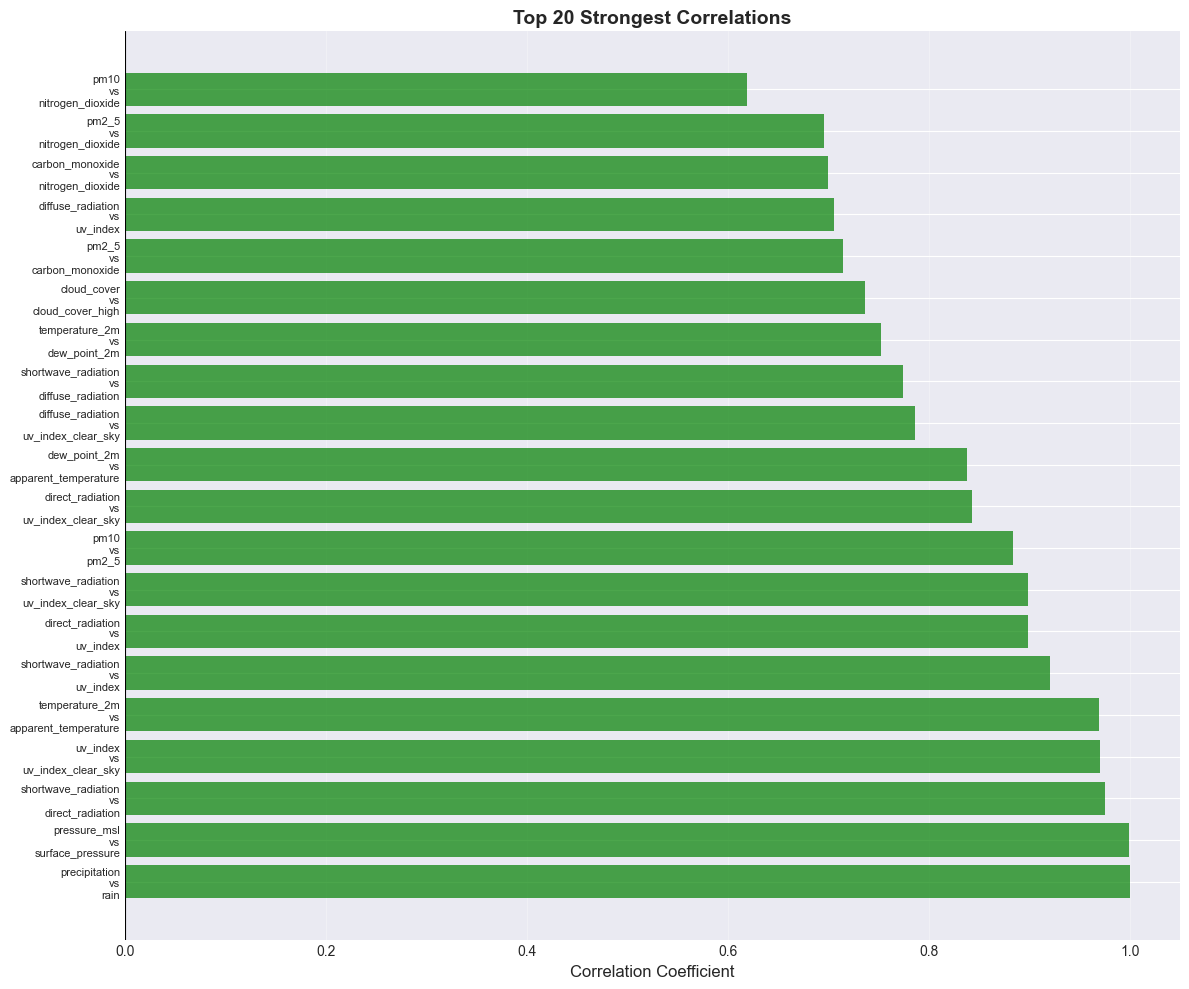

In [29]:
# Visualize top correlations
fig, ax = plt.subplots(figsize=(12, 10))

top_20 = top_corr.head(20)
labels = [f"{row['Variable_1']}\nvs\n{row['Variable_2']}" for _, row in top_20.iterrows()]
colors = ['red' if x < 0 else 'green' for x in top_20['Correlation']]

ax.barh(range(len(top_20)), top_20['Correlation'], color=colors, alpha=0.7)
ax.set_yticks(range(len(top_20)))
ax.set_yticklabels(labels, fontsize=8)
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_title('Top 20 Strongest Correlations', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 7.3 Correlations with Temperature (Our Target)

CORRELATIONS WITH TEMPERATURE (temperature_2m)


temperature_2m           1.000
apparent_temperature     0.970
dew_point_2m             0.752
shortwave_radiation      0.573
direct_radiation         0.560
uv_index                 0.557
uv_index_clear_sky       0.540
diffuse_radiation        0.442
ozone                    0.371
winddirection_10m        0.354
aerosol_optical_depth    0.199
dust                     0.115
windspeed_10m            0.021
snowfall                -0.020
sulphur_dioxide         -0.047
cloud_cover_high        -0.051
rain                    -0.053
precipitation           -0.053
cloud_cover_low         -0.078
cloud_cover             -0.083
cloud_cover_mid         -0.142
pm10                    -0.164
surface_pressure        -0.201
pressure_msl            -0.228
pm2_5                   -0.236
nitrogen_dioxide        -0.240
carbon_monoxide         -0.306
relative_humidity_2m    -0.336
windspeed_80m              NaN
winddirection_80m          NaN
Name: temperature_2m, dtype: float64

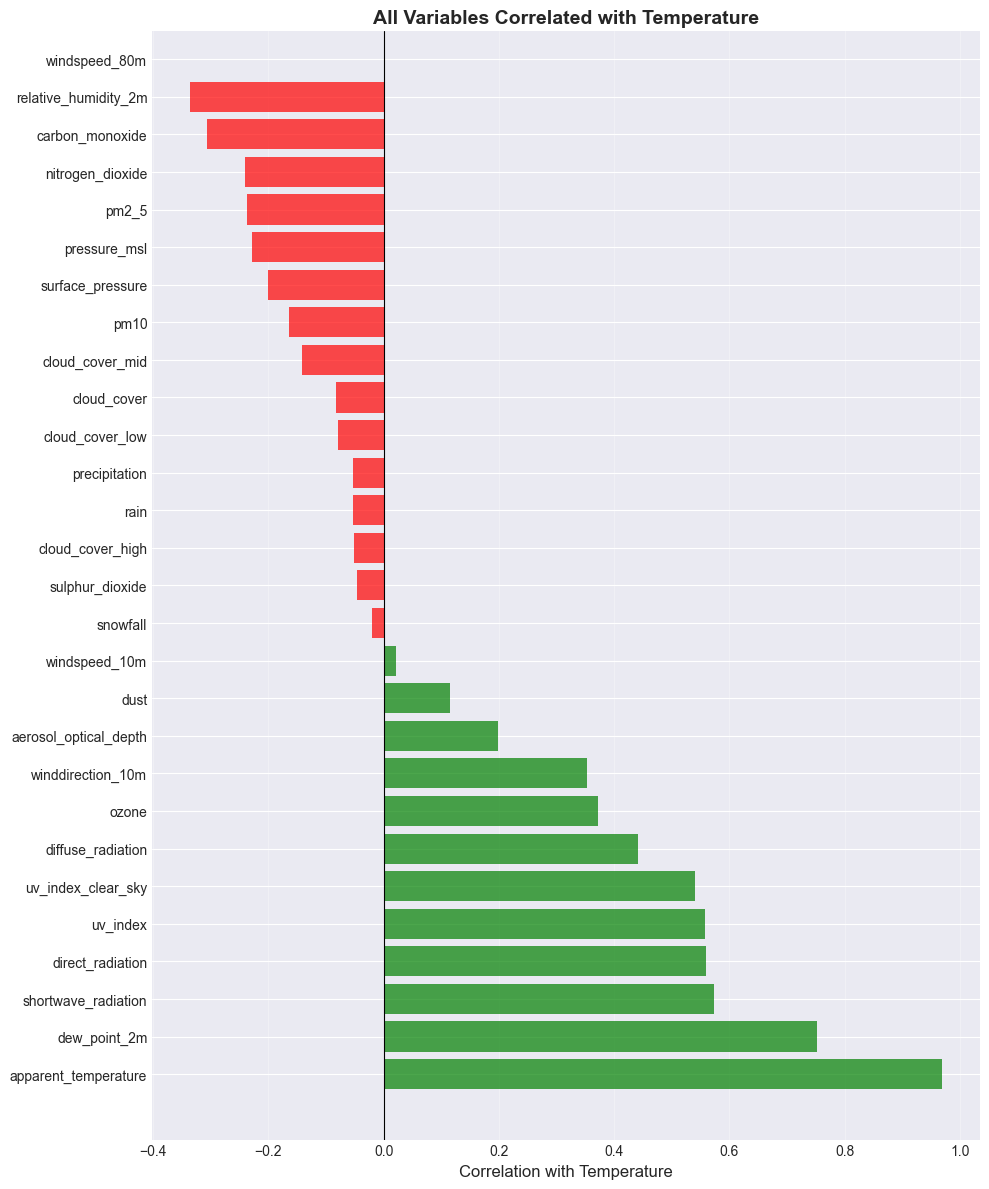

In [30]:
# Correlations with temperature_2m
temp_corr = corr_matrix['temperature_2m'].sort_values(ascending=False)

print("="*80)
print("CORRELATIONS WITH TEMPERATURE (temperature_2m)")
print("="*80)
display(temp_corr)

# Plot
fig, ax = plt.subplots(figsize=(10, 12))
temp_corr_no_self = temp_corr.drop('temperature_2m')  # Remove self-correlation
colors = ['red' if x < 0 else 'green' for x in temp_corr_no_self]

ax.barh(temp_corr_no_self.index, temp_corr_no_self.values, color=colors, alpha=0.7)
ax.set_xlabel('Correlation with Temperature', fontsize=12)
ax.set_title('All Variables Correlated with Temperature', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 7.4 Correlations with PM2.5 (Our Target)

CORRELATIONS WITH PM2.5 (pm2_5)


pm2_5                    1.000
pm10                     0.884
carbon_monoxide          0.714
nitrogen_dioxide         0.696
sulphur_dioxide          0.468
pressure_msl             0.300
dust                     0.299
surface_pressure         0.295
aerosol_optical_depth    0.126
relative_humidity_2m     0.086
snowfall                -0.011
cloud_cover_high        -0.024
cloud_cover             -0.094
uv_index                -0.110
direct_radiation        -0.130
uv_index_clear_sky      -0.140
shortwave_radiation     -0.155
rain                    -0.159
precipitation           -0.159
apparent_temperature    -0.163
cloud_cover_low         -0.172
cloud_cover_mid         -0.175
dew_point_2m            -0.180
diffuse_radiation       -0.182
temperature_2m          -0.236
winddirection_10m       -0.298
windspeed_10m           -0.361
ozone                   -0.447
windspeed_80m              NaN
winddirection_80m          NaN
Name: pm2_5, dtype: float64

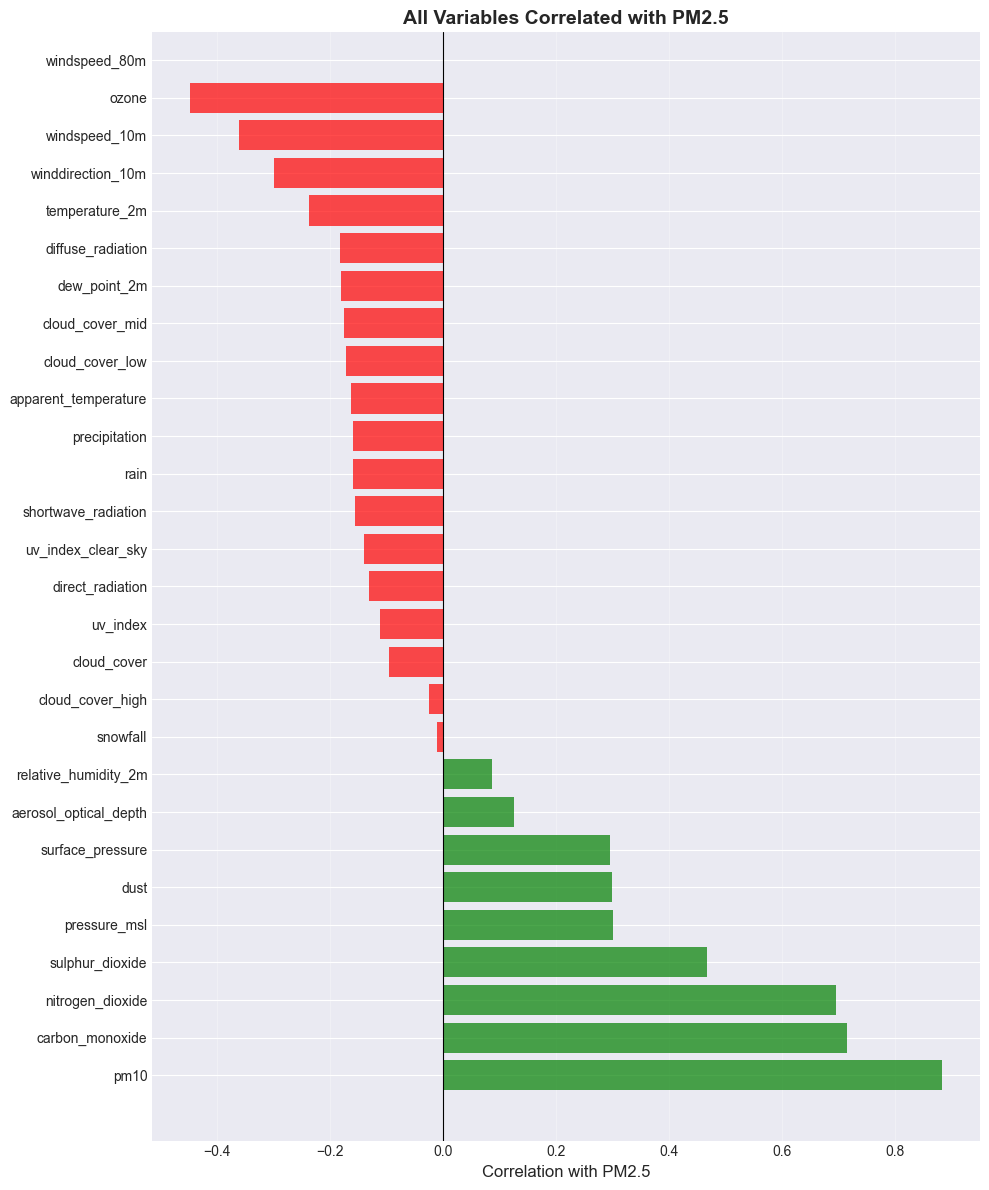

In [31]:
# Correlations with pm2_5
pm25_corr = corr_matrix['pm2_5'].sort_values(ascending=False)

print("="*80)
print("CORRELATIONS WITH PM2.5 (pm2_5)")
print("="*80)
display(pm25_corr)

# Plot
fig, ax = plt.subplots(figsize=(10, 12))
pm25_corr_no_self = pm25_corr.drop('pm2_5')  # Remove self-correlation
colors = ['red' if x < 0 else 'green' for x in pm25_corr_no_self]

ax.barh(pm25_corr_no_self.index, pm25_corr_no_self.values, color=colors, alpha=0.7)
ax.set_xlabel('Correlation with PM2.5', fontsize=12)
ax.set_title('All Variables Correlated with PM2.5', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Seasonal Patterns Across Variables

Let's see which variables show strong seasonal patterns

In [32]:
# Calculate monthly averages for all variables
df_monthly = df.resample('M').mean()

print(f"Monthly data shape: {df_monthly.shape}")
print(f"Covering {len(df_monthly)} months")

Monthly data shape: (61, 30)
Covering 61 months


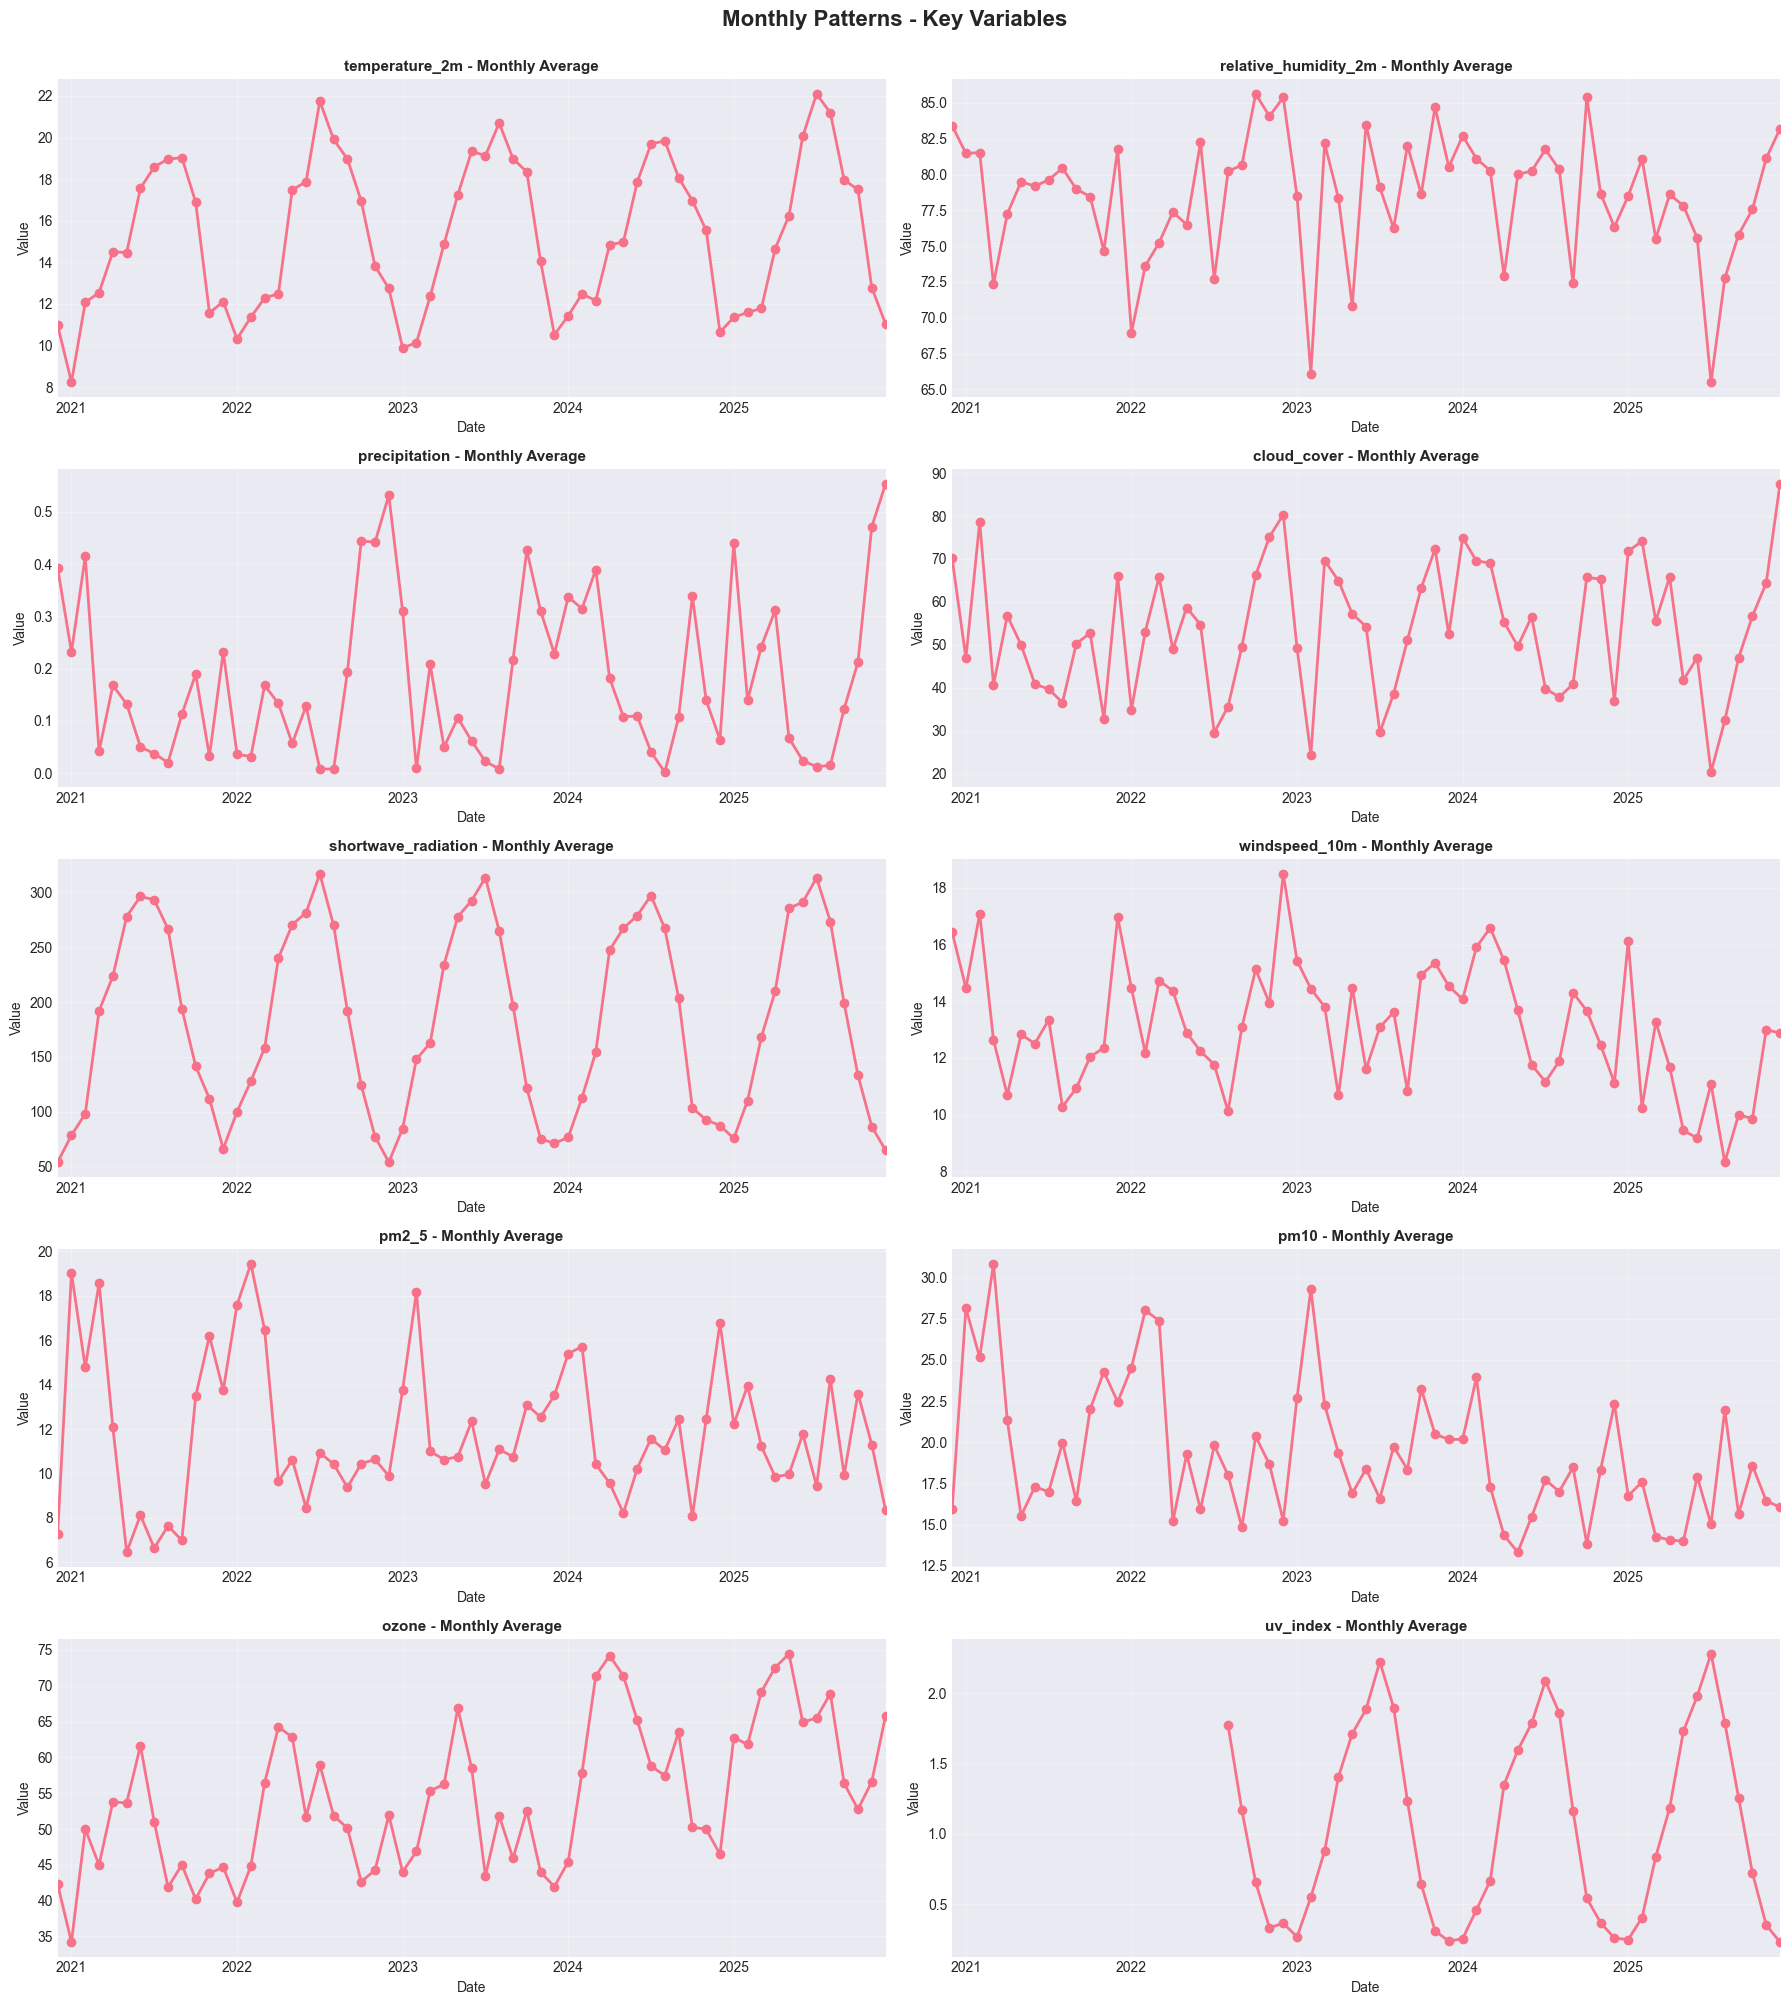

In [33]:
# Plot monthly patterns for key variables from each category
key_vars = [
    'temperature_2m', 'relative_humidity_2m', 
    'precipitation', 'cloud_cover',
    'shortwave_radiation', 'windspeed_10m',
    'pm2_5', 'pm10', 'ozone', 'uv_index'
]

fig, axes = plt.subplots(5, 2, figsize=(18, 20))
axes = axes.flatten()

for idx, var in enumerate(key_vars):
    ax = axes[idx]
    df_monthly[var].plot(ax=ax, marker='o', linewidth=2)
    ax.set_title(f'{var} - Monthly Average', fontsize=11, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Date')

plt.suptitle('Monthly Patterns - Key Variables', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

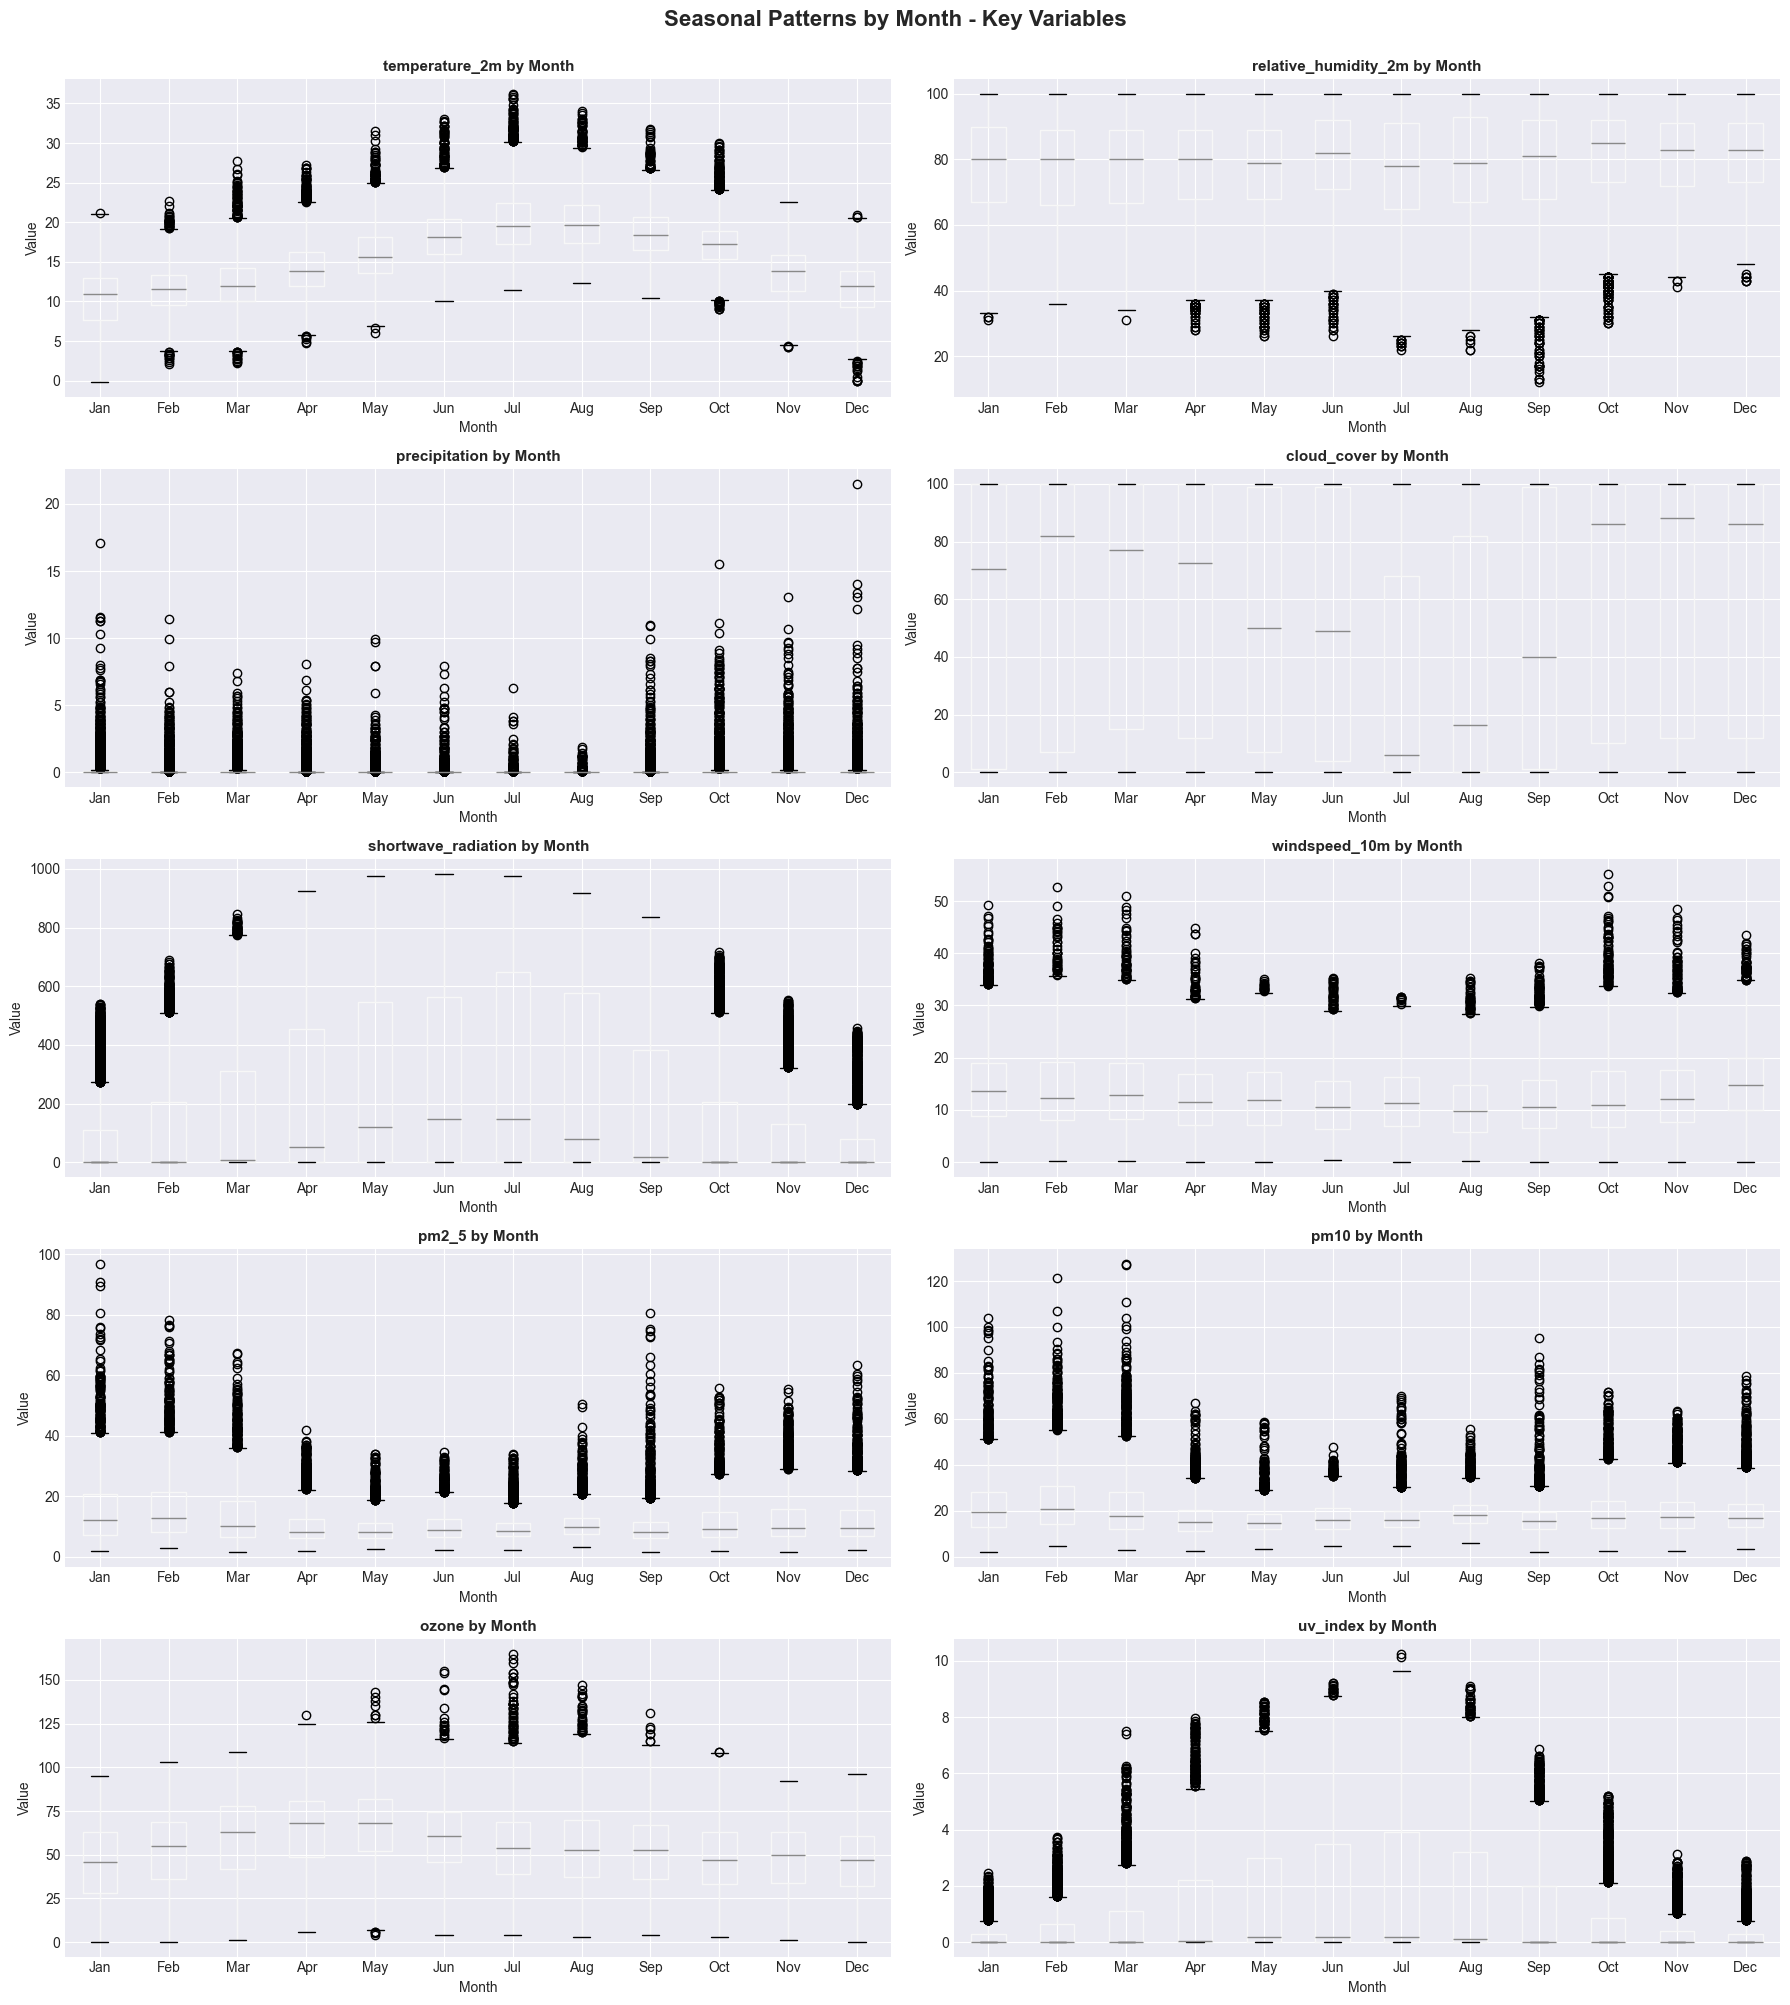

In [34]:
# Boxplot by month for key variables
fig, axes = plt.subplots(5, 2, figsize=(18, 20))
axes = axes.flatten()

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for idx, var in enumerate(key_vars):
    ax = axes[idx]
    
    # Create dataframe with month
    var_df = pd.DataFrame({'value': df[var], 'month': df.index.month})
    var_df.boxplot(column='value', by='month', ax=ax)
    
    ax.set_title(f'{var} by Month', fontsize=11, fontweight='bold')
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')
    ax.set_xticklabels(month_labels)
    plt.sca(ax)
    plt.xticks(range(1, 13), month_labels)

plt.suptitle('Seasonal Patterns by Month - Key Variables', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 9. Wind Analysis

Special analysis for wind direction and speed

In [35]:
# Wind rose plot (simplified)
# Bin wind directions into 8 cardinal directions
def get_wind_direction_category(degree):
    directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    idx = int((degree + 22.5) / 45) % 8
    return directions[idx]

df['wind_dir_category'] = df['winddirection_10m'].apply(get_wind_direction_category)

# Count occurrences
wind_counts = df['wind_dir_category'].value_counts().reindex(
    ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
)

print("Wind Direction Distribution:")
print(wind_counts)
print(f"\nMost common wind direction: {wind_counts.idxmax()}")
print(f"Least common wind direction: {wind_counts.idxmin()}")

Wind Direction Distribution:
wind_dir_category
N     6252
NE    3291
E     8130
SE    2840
S     6276
SW    4237
W     3697
NW    9101
Name: count, dtype: int64

Most common wind direction: NW
Least common wind direction: SE


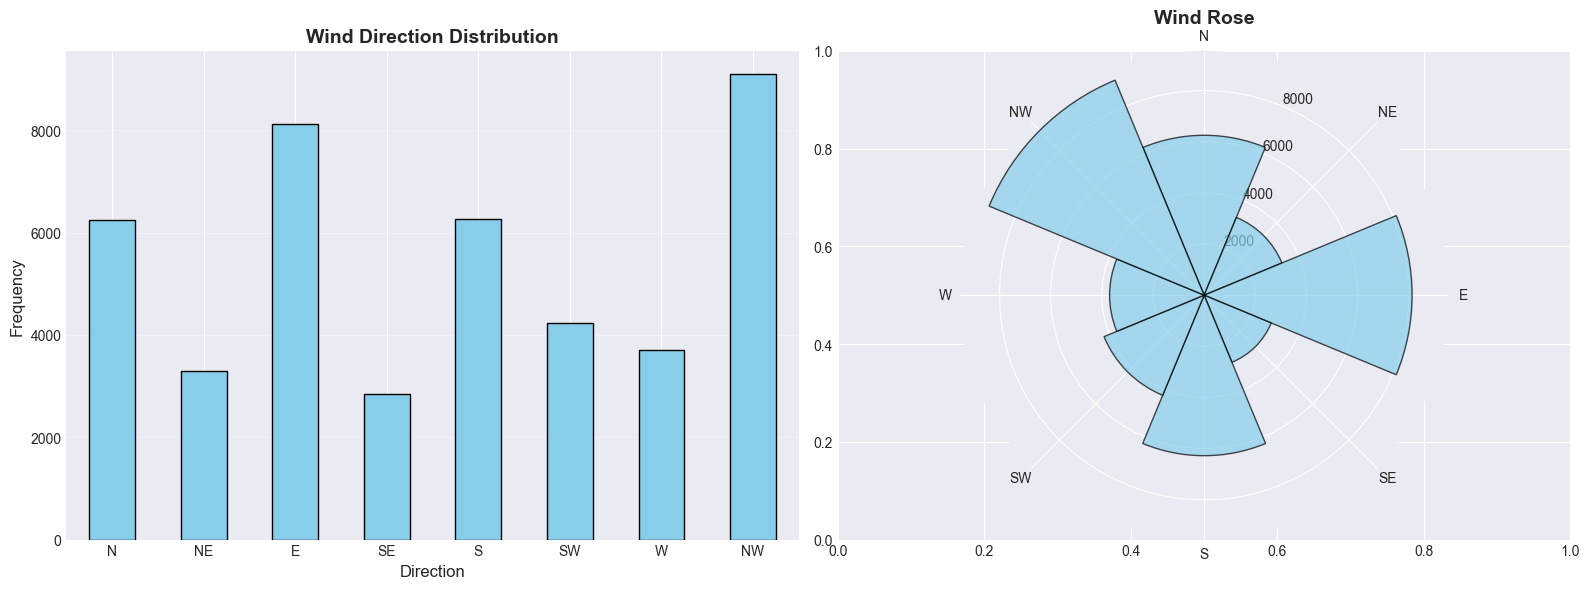

In [36]:
# Plot wind direction distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
wind_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Wind Direction Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Direction', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(wind_counts.index, rotation=0)

# Polar plot (wind rose)
angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)
values = wind_counts.values

ax_polar = plt.subplot(122, projection='polar')
bars = ax_polar.bar(angles, values, width=2*np.pi/8, alpha=0.7, color='skyblue', edgecolor='black')
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(-1)
ax_polar.set_xticks(angles)
ax_polar.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
ax_polar.set_title('Wind Rose', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

Wind Speed Statistics by Direction:


mean  median    std   max
wind_dir_category                             
N                  11.328    10.5  5.443  35.0
NE                  8.496     7.7  4.091  27.7
E                  12.847    12.2  6.887  37.5
SE                  9.229     8.0  5.610  48.8
S                  16.716    15.9  8.822  55.2
SW                 14.855    13.6  8.577  51.0
W                  11.836    10.2  7.637  49.1
NW                 14.342    13.8  6.793  43.6

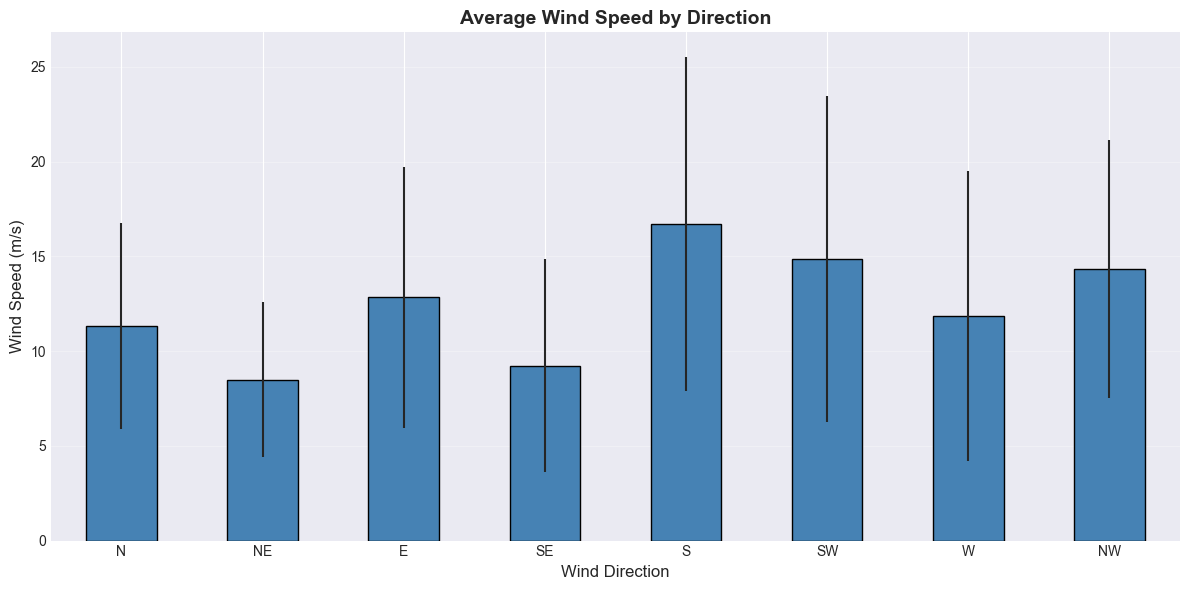

In [37]:
# Wind speed statistics by direction
wind_stats = df.groupby('wind_dir_category')['windspeed_10m'].agg(['mean', 'median', 'std', 'max']).reindex(
    ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
)

print("Wind Speed Statistics by Direction:")
display(wind_stats)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
wind_stats['mean'].plot(kind='bar', ax=ax, color='steelblue', edgecolor='black', yerr=wind_stats['std'])
ax.set_title('Average Wind Speed by Direction', fontsize=14, fontweight='bold')
ax.set_xlabel('Wind Direction', fontsize=12)
ax.set_ylabel('Wind Speed (m/s)', fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_xticklabels(wind_stats.index, rotation=0)
plt.tight_layout()
plt.show()

## 10. Air Quality Overview

Comprehensive analysis of all air quality variables

In [38]:
# Air quality variables
aq_vars = ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 
           'sulphur_dioxide', 'ozone', 'aerosol_optical_depth', 'dust']

print("="*80)
print("AIR QUALITY SUMMARY STATISTICS")
print("="*80)
display(df[aq_vars].describe())

AIR QUALITY SUMMARY STATISTICS


pm10      pm2_5  carbon_monoxide  nitrogen_dioxide  \
count  43824.000  43824.000        43824.000         43824.000   
mean      19.241     11.837          164.758            14.043   
std       10.519      8.052           48.613            10.513   
min        1.900      1.500           58.000             1.100   
25%       12.500      6.700          135.000             6.800   
50%       16.700      9.300          156.000            11.000   
75%       22.800     14.200          183.000            18.100   
max      127.500     96.800         2749.000            88.300   

       sulphur_dioxide      ozone  aerosol_optical_depth       dust  
count        43824.000  43824.000              29280.000  43824.000  
mean             2.179     54.261                  0.142      1.269  
std              1.085     22.555                  0.127      4.257  
min              0.200      0.000                  0.010      0.000  
25%              1.400     37.000                  0.070      0.000  
50%              2.000     55.000                  0.120      0.000  
75%              2.700     70.000                  0.170      1.000  
max             12.200    165.000                  4.220    107.000

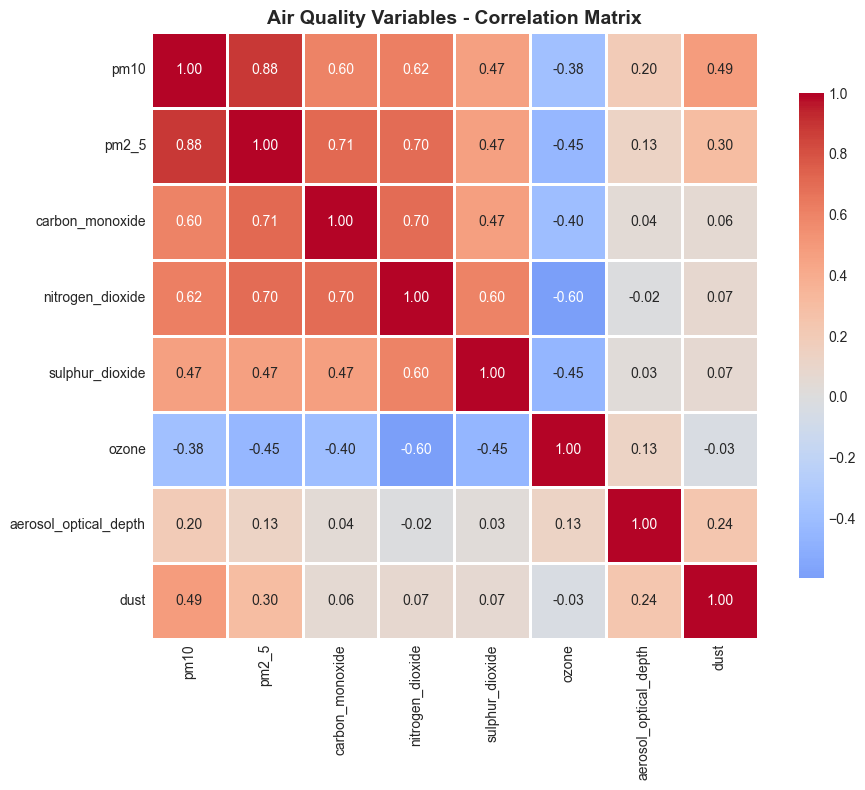

In [39]:
# Air quality correlation matrix
aq_corr = df[aq_vars].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(aq_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Air Quality Variables - Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

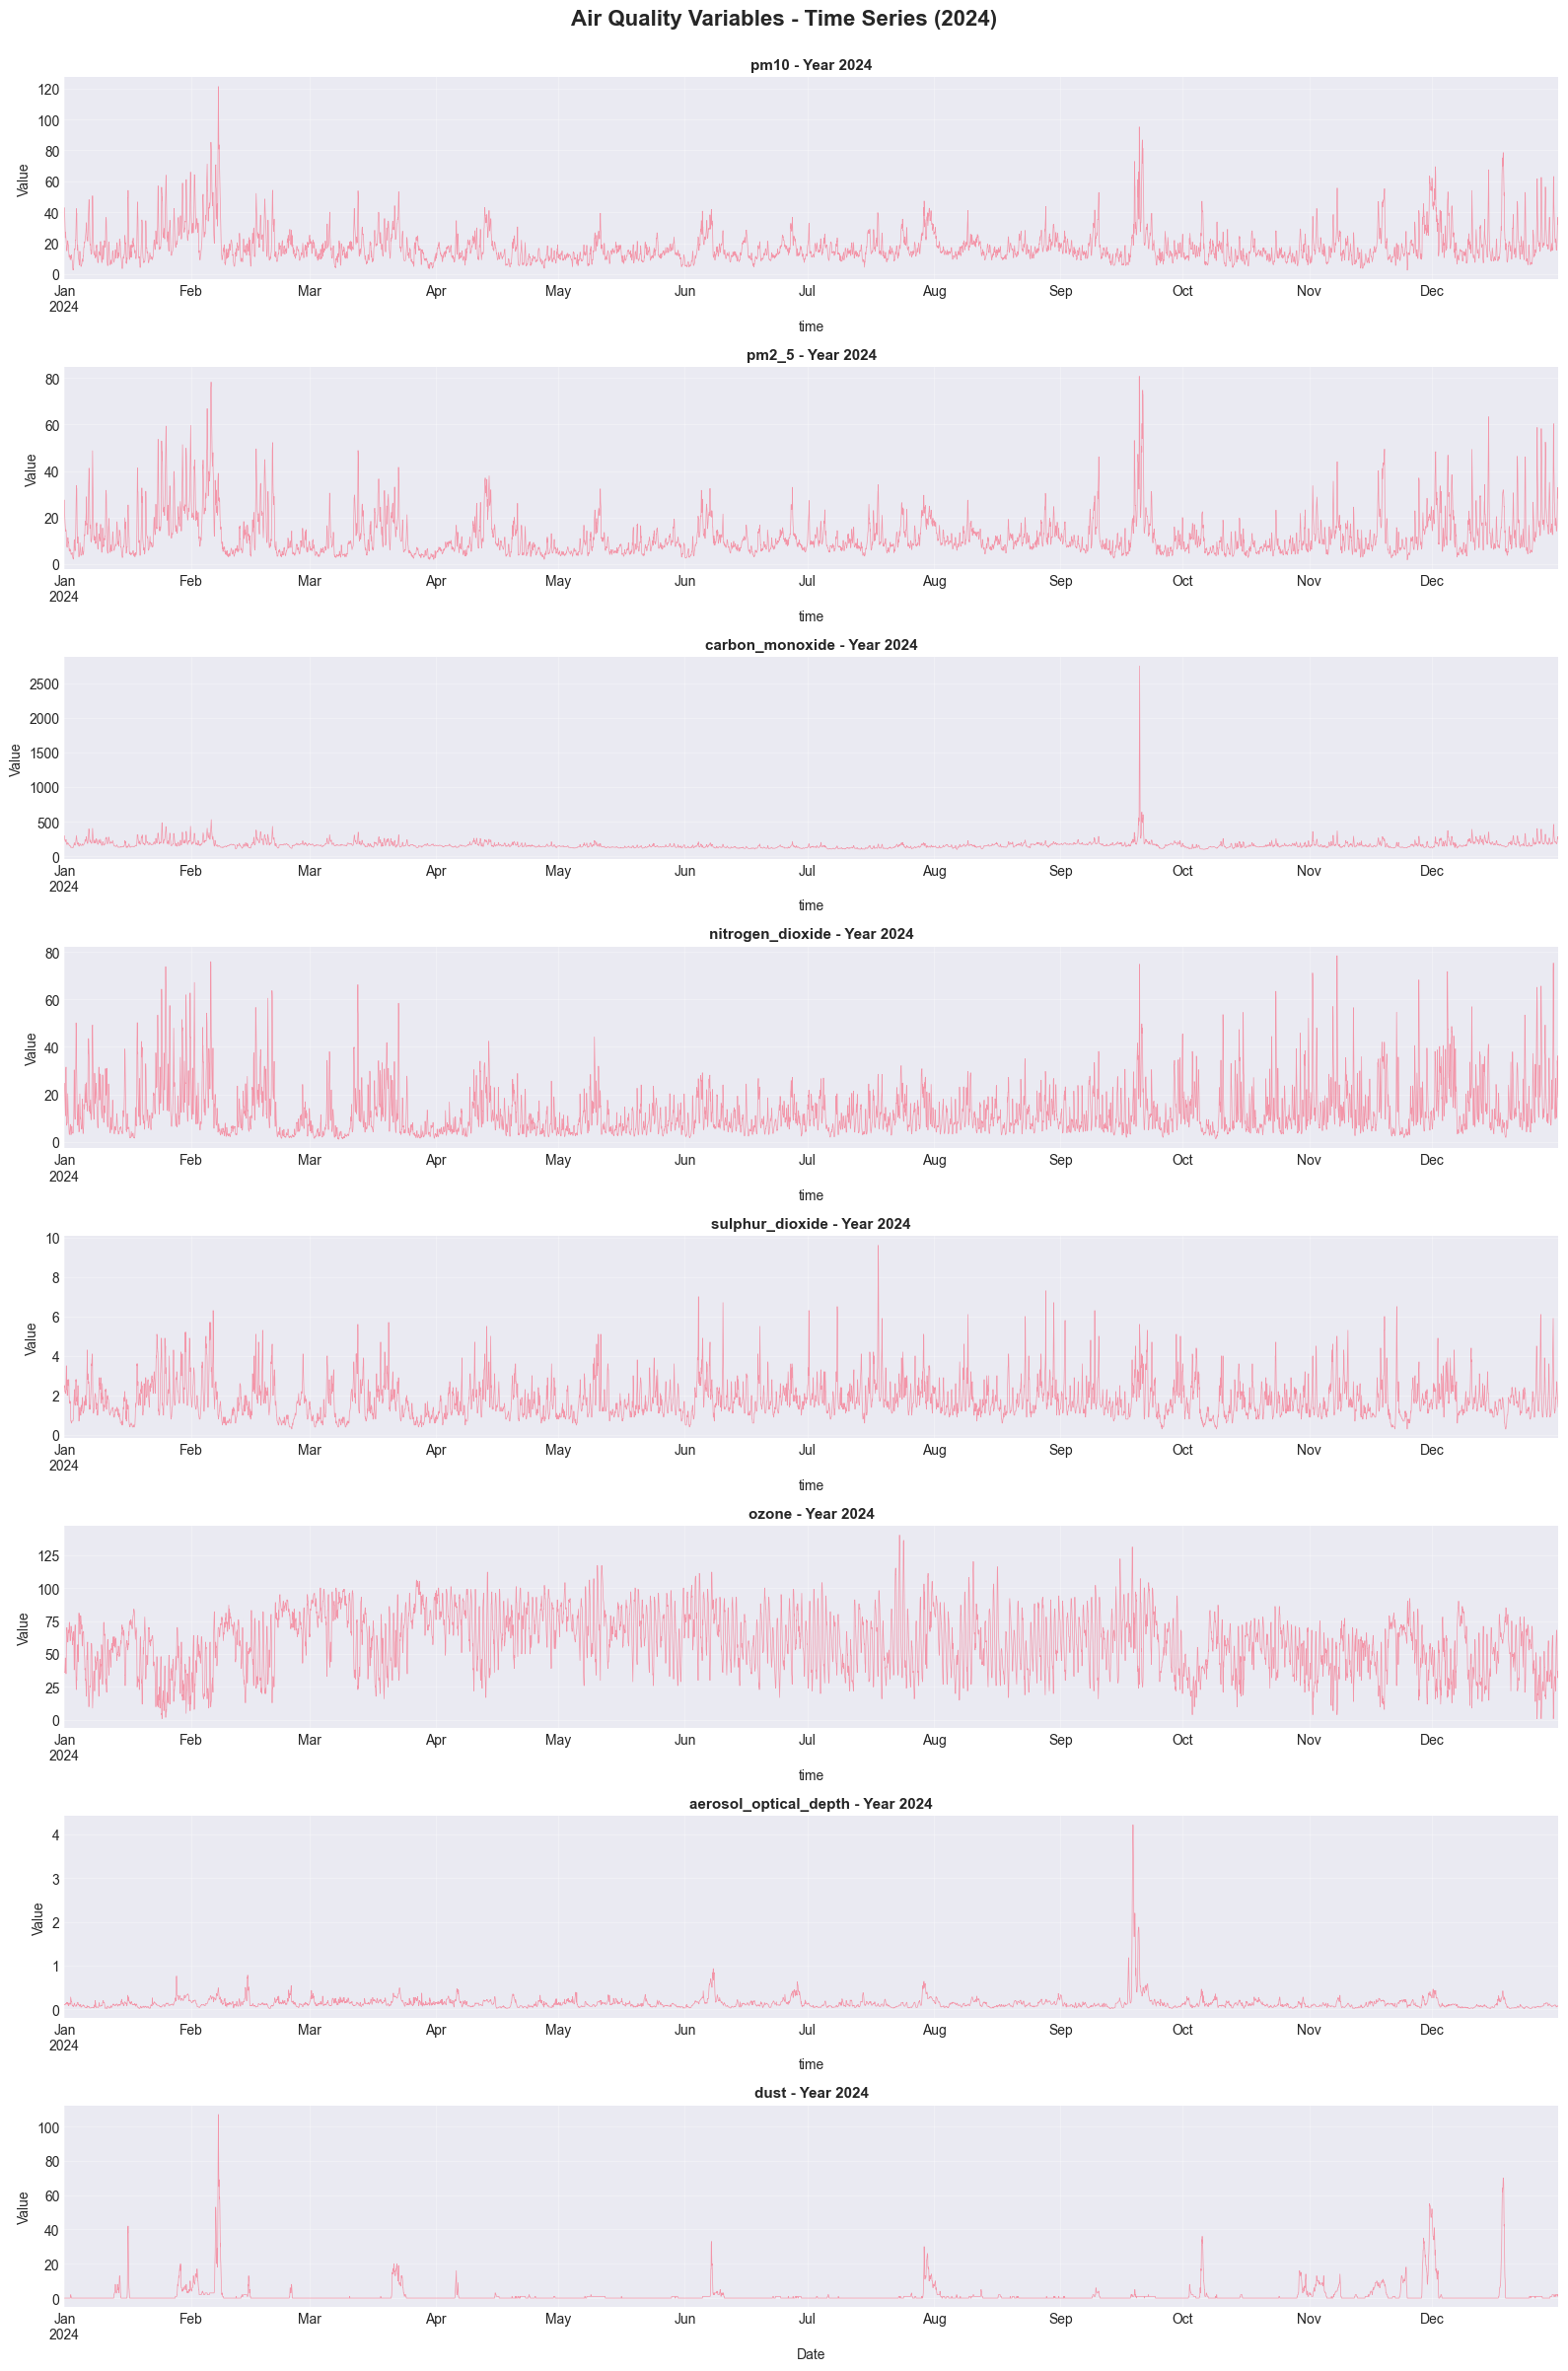

In [40]:
# Time series of all air quality variables (one year)
fig, axes = plt.subplots(len(aq_vars), 1, figsize=(16, 3*len(aq_vars)))

for idx, var in enumerate(aq_vars):
    ax = axes[idx]
    df[var]['2024'].plot(ax=ax, linewidth=0.5, alpha=0.7)
    ax.set_title(f'{var} - Year 2024', fontsize=11, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel('Date')
plt.suptitle('Air Quality Variables - Time Series (2024)', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 11. Extreme Values Analysis

In [41]:
# Find extreme values (top/bottom 1%) for key variables
key_vars_extreme = ['temperature_2m', 'pm2_5', 'windspeed_10m', 'precipitation', 'ozone']

print("="*80)
print("EXTREME VALUES ANALYSIS")
print("="*80)

for var in key_vars_extreme:
    print(f"\n{var.upper()}:")
    
    # Top 5 highest
    top5 = df[var].nlargest(5)
    print("\n  Top 5 highest:")
    for date, value in top5.items():
        print(f"    {date}: {value:.2f}")
    
    # Bottom 5 lowest
    bottom5 = df[var].nsmallest(5)
    print("\n  Bottom 5 lowest:")
    for date, value in bottom5.items():
        print(f"    {date}: {value:.2f}")
    
    # Percentiles
    p1 = df[var].quantile(0.01)
    p99 = df[var].quantile(0.99)
    print(f"\n  1st percentile: {p1:.2f}")
    print(f"  99th percentile: {p99:.2f}")
    print(f"  Range (1%-99%): {p99 - p1:.2f}")

EXTREME VALUES ANALYSIS

TEMPERATURE_2M:

  Top 5 highest:
    2022-07-12 11:00:00: 36.20
    2022-07-12 10:00:00: 36.00
    2022-07-13 14:00:00: 35.80
    2022-07-12 13:00:00: 35.60
    2022-07-13 13:00:00: 35.60

  Bottom 5 lowest:
    2021-01-13 08:00:00: -0.20
    2021-01-09 06:00:00: -0.10
    2021-01-13 07:00:00: -0.10
    2023-12-19 06:00:00: -0.10
    2023-12-19 07:00:00: -0.10

  1st percentile: 4.50
  99th percentile: 28.00
  Range (1%-99%): 23.50

PM2_5:

  Top 5 highest:
    2025-01-15 23:00:00: 96.80
    2025-01-15 22:00:00: 90.70
    2025-01-16 00:00:00: 89.50
    2024-09-20 08:00:00: 80.70
    2025-01-16 22:00:00: 80.40

  Bottom 5 lowest:
    2025-09-28 03:00:00: 1.50
    2025-09-28 05:00:00: 1.60
    2025-03-21 02:00:00: 1.70
    2025-09-28 04:00:00: 1.70
    2025-11-13 04:00:00: 1.70

  1st percentile: 3.20
  99th percentile: 42.58
  Range (1%-99%): 39.38

WINDSPEED_10M:

  Top 5 highest:
    2024-10-09 05:00:00: 55.20
    2024-10-09 04:00:00: 52.80
    2021-02-20 09:

## 12. Daily vs Hourly Patterns

Compare average patterns by hour of day

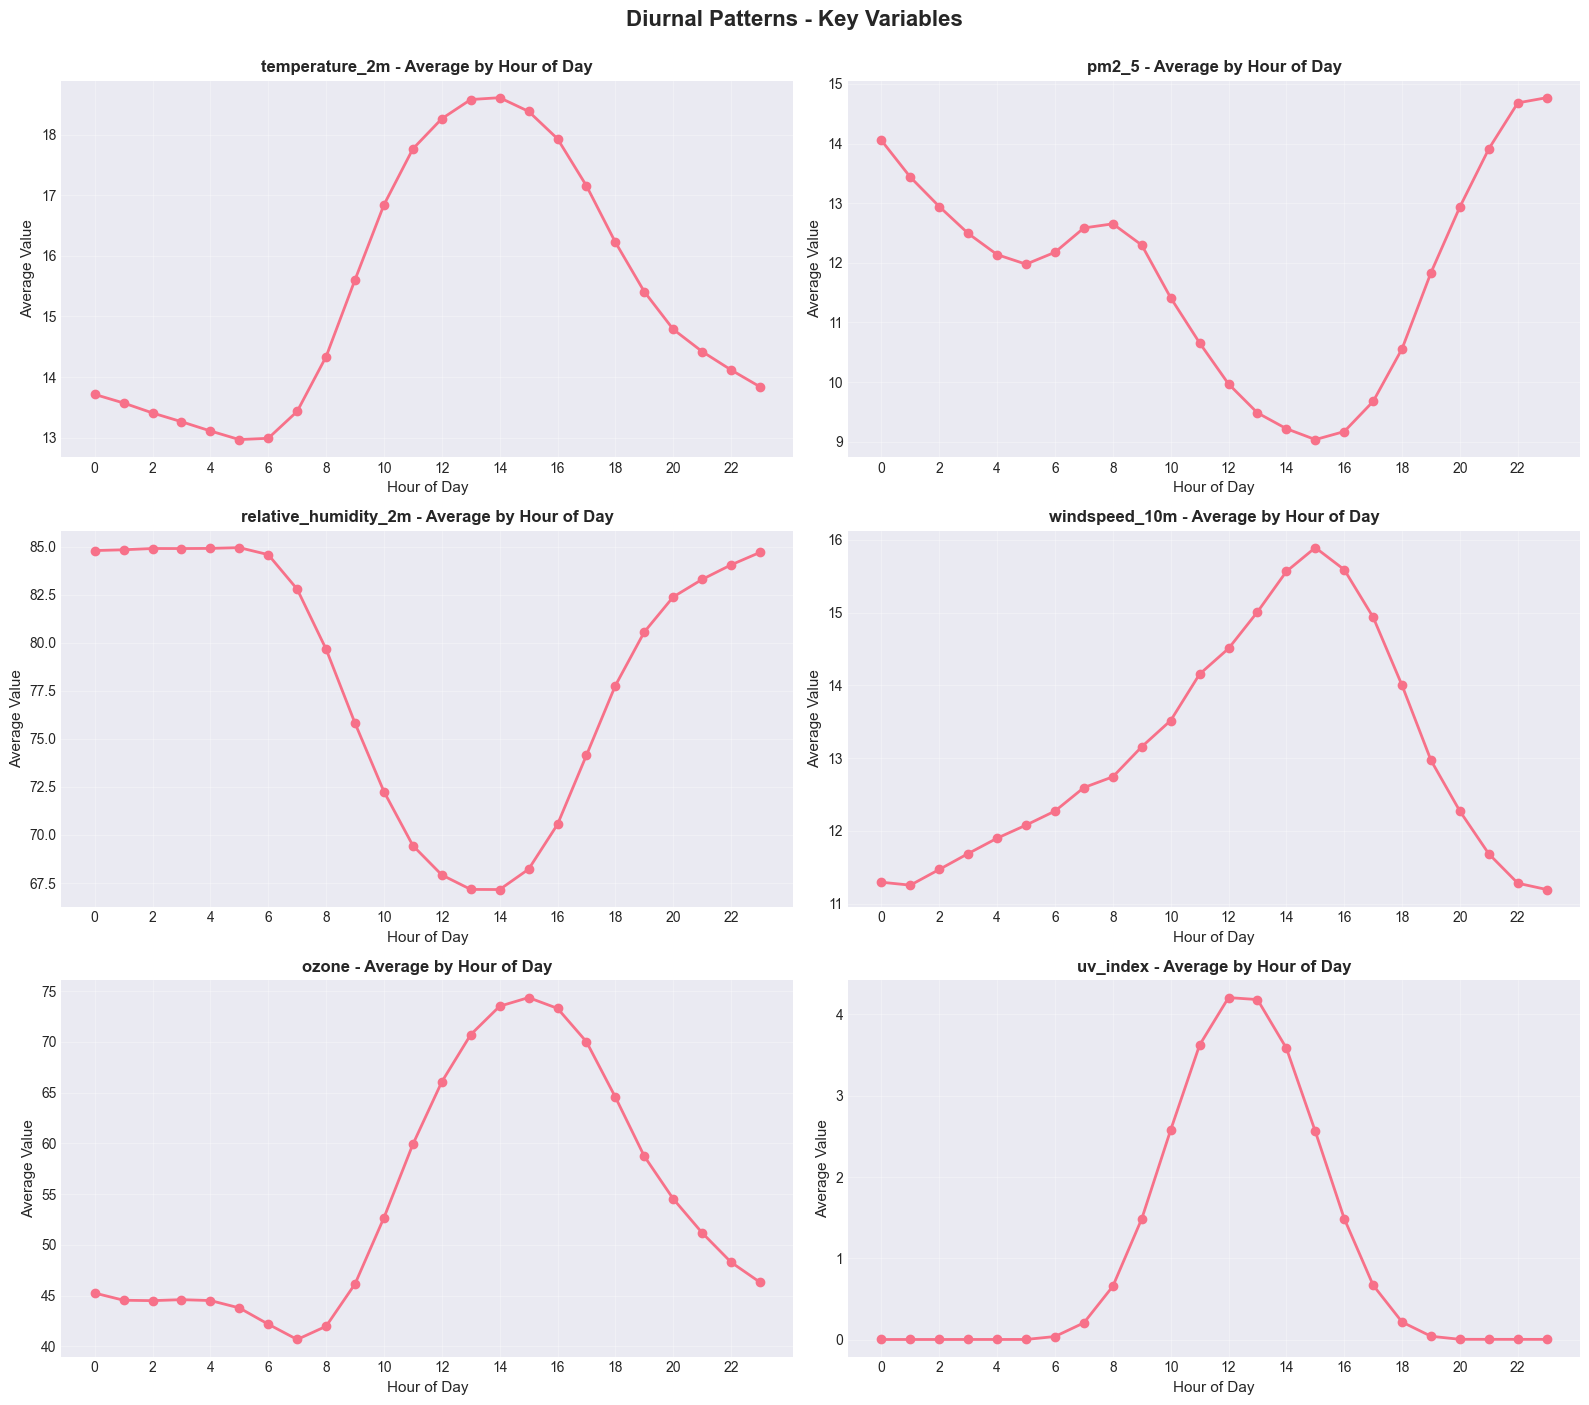

In [42]:
# Average by hour for key variables
hourly_patterns = {
    'temperature_2m': df.groupby(df.index.hour)['temperature_2m'].mean(),
    'pm2_5': df.groupby(df.index.hour)['pm2_5'].mean(),
    'relative_humidity_2m': df.groupby(df.index.hour)['relative_humidity_2m'].mean(),
    'windspeed_10m': df.groupby(df.index.hour)['windspeed_10m'].mean(),
    'ozone': df.groupby(df.index.hour)['ozone'].mean(),
    'uv_index': df.groupby(df.index.hour)['uv_index'].mean()
}

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, (var, data) in enumerate(hourly_patterns.items()):
    ax = axes[idx]
    ax.plot(data.index, data.values, marker='o', linewidth=2, markersize=6)
    ax.set_title(f'{var} - Average by Hour of Day', fontsize=12, fontweight='bold')
    ax.set_xlabel('Hour of Day', fontsize=11)
    ax.set_ylabel('Average Value', fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(0, 24, 2))

plt.suptitle('Diurnal Patterns - Key Variables', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 13. Key Insights Summary

In [43]:
print("="*80)
print("KEY INSIGHTS FROM COMPREHENSIVE EDA")
print("="*80)

print("\n📊 DATASET CHARACTERISTICS:")
print(f"  • {df.shape[0]:,} hourly observations over {(df.index.max() - df.index.min()).days/365:.2f} years")
print(f"  • {df.shape[1]} variables across weather and air quality")
print(f"  • Missing data rate: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

print("\n🌡️  TEMPERATURE INSIGHTS:")
print(f"  • Range: {df['temperature_2m'].min():.1f}°C to {df['temperature_2m'].max():.1f}°C")
print(f"  • Mean: {df['temperature_2m'].mean():.1f}°C (typical Porto climate)")
print(f"  • Strong seasonal cycle (summer peak ~{df['temperature_2m'].quantile(0.95):.1f}°C)")
print(f"  • Clear diurnal pattern (day/night variation ~{df.groupby(df.index.hour)['temperature_2m'].mean().max() - df.groupby(df.index.hour)['temperature_2m'].mean().min():.1f}°C)")

print("\n💨 PM2.5 INSIGHTS:")
print(f"  • Range: {df['pm2_5'].min():.1f} to {df['pm2_5'].max():.1f} μg/m³")
print(f"  • Mean: {df['pm2_5'].mean():.1f} μg/m³ (generally good air quality)")
print(f"  • High correlation with PM10 (r={corr_matrix.loc['pm2_5', 'pm10']:.3f})")
print(f"  • Negative correlation with temperature (r={corr_matrix.loc['pm2_5', 'temperature_2m']:.3f})")

print("\n🔗 STRONGEST CORRELATIONS:")
top_3 = get_top_correlations(corr_matrix, n=3)
for idx, row in top_3.iterrows():
    print(f"  • {row['Variable_1']} ↔ {row['Variable_2']}: r={row['Correlation']:.3f}")

print("\n🌬️  WIND INSIGHTS:")
print(f"  • Most common direction: {wind_counts.idxmax()} ({wind_counts.max():,} observations)")
print(f"  • Mean wind speed: {df['windspeed_10m'].mean():.2f} m/s")
print(f"  • Max recorded: {df['windspeed_10m'].max():.2f} m/s")

print("\n☀️  SOLAR RADIATION:")
print(f"  • Mean UV index: {df['uv_index'].mean():.2f}")
print(f"  • Peak UV (99th percentile): {df['uv_index'].quantile(0.99):.2f}")
print(f"  • Strong correlation with temperature (r={corr_matrix.loc['uv_index', 'temperature_2m']:.3f})")

print("\n🏭 AIR QUALITY VARIABLES:")
print(f"  • PM2.5 mean: {df['pm2_5'].mean():.2f} μg/m³")
print(f"  • PM10 mean: {df['pm10'].mean():.2f} μg/m³")
print(f"  • Ozone mean: {df['ozone'].mean():.2f} μg/m³")
print(f"  • NO2 mean: {df['nitrogen_dioxide'].mean():.2f} μg/m³")
print(f"  • Overall air quality: Good (PM2.5 mostly < 25 μg/m³)")

print("\n💡 MODELING IMPLICATIONS:")
print("  ✓ Temperature shows strong predictable patterns → Good for forecasting")
print("  ✓ PM2.5 more volatile but influenced by weather → SARIMA + exogenous variables?")
print("  ✓ Clear seasonal and diurnal cycles → Multiple seasonal periods to consider")
print("  ✓ Wind patterns stable → Can inform directional air quality analysis")
print("  ✓ Solar radiation strongly linked to temperature → Potential predictor")

print("\n" + "="*80)

KEY INSIGHTS FROM COMPREHENSIVE EDA

📊 DATASET CHARACTERISTICS:
  • 43,824 hourly observations over 5.00 years
  • 31 variables across weather and air quality
  • Missing data rate: 9.66%

🌡️  TEMPERATURE INSIGHTS:
  • Range: -0.2°C to 36.2°C
  • Mean: 15.4°C (typical Porto climate)
  • Strong seasonal cycle (summer peak ~23.5°C)
  • Clear diurnal pattern (day/night variation ~5.6°C)

💨 PM2.5 INSIGHTS:
  • Range: 1.5 to 96.8 μg/m³
  • Mean: 11.8 μg/m³ (generally good air quality)
  • High correlation with PM10 (r=0.884)
  • Negative correlation with temperature (r=-0.236)

🔗 STRONGEST CORRELATIONS:
  • precipitation ↔ rain: r=1.000
  • pressure_msl ↔ surface_pressure: r=1.000
  • shortwave_radiation ↔ direct_radiation: r=0.975

🌬️  WIND INSIGHTS:
  • Most common direction: NW (9,101 observations)
  • Mean wind speed: 13.04 m/s
  • Max recorded: 55.20 m/s

☀️  SOLAR RADIATION:
  • Mean UV index: 1.07
  • Peak UV (99th percentile): 7.95
  • Strong correlation with temperature (r=0.557)



## 14. Export Summary Statistics

In [46]:
# Create summary dataframe for report
numeric_cols = df.select_dtypes(include=[np.number]).columns

summary_stats = pd.DataFrame({
    'Variable': numeric_cols,
    'Mean': df[numeric_cols].mean(),
    'Std': df[numeric_cols].std(),
    'Min': df[numeric_cols].min(),
    'Max': df[numeric_cols].max(),
    'Median': df[numeric_cols].median(),
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurtosis(),
    'Missing_%': (df[numeric_cols].isnull().sum() / len(df) * 100)
})

print("Summary Statistics Table:")
display(summary_stats)



Summary Statistics Table:


Variable       Mean      Std     Min  \
temperature_2m                temperature_2m  1.536e+01    4.863   -0.20   
relative_humidity_2m    relative_humidity_2m  7.841e+01   14.909   12.00   
dew_point_2m                    dew_point_2m  1.130e+01    4.663   -8.80   
apparent_temperature    apparent_temperature  1.417e+01    6.255   -4.70   
pressure_msl                    pressure_msl  1.018e+03    6.530  986.20   
surface_pressure            surface_pressure  1.007e+03    6.419  975.40   
precipitation                  precipitation  1.737e-01    0.700    0.00   
rain                                    rain  1.737e-01    0.700    0.00   
snowfall                            snowfall  1.917e-05    0.002    0.00   
cloud_cover                      cloud_cover  5.299e+01   42.893    0.00   
cloud_cover_low              cloud_cover_low  2.737e+01   37.441    0.00   
cloud_cover_mid              cloud_cover_mid  1.966e+01   32.664    0.00   
cloud_cover_high            cloud_cover_high  3.449e+01   42.545    0.00   
shortwave_radiation      shortwave_radiation  1.850e+02  265.378    0.00   
direct_radiation            direct_radiation  1.295e+02  212.805    0.00   
diffuse_radiation          diffuse_radiation  5.552e+01   74.761    0.00   
windspeed_10m                  windspeed_10m  1.304e+01    7.397    0.00   
windspeed_80m                  windspeed_80m        NaN      NaN     NaN   
winddirection_10m          winddirection_10m  1.981e+02  108.470    1.00   
winddirection_80m          winddirection_80m        NaN      NaN     NaN   
pm10                                    pm10  1.924e+01   10.519    1.90   
pm2_5                                  pm2_5  1.184e+01    8.052    1.50   
carbon_monoxide              carbon_monoxide  1.648e+02   48.613   58.00   
nitrogen_dioxide            nitrogen_dioxide  1.404e+01   10.513    1.10   
sulphur_dioxide              sulphur_dioxide  2.179e+00    1.085    0.20   
ozone                                  ozone  5.426e+01   22.555    0.00   
aerosol_optical_depth  aerosol_optical_depth  1.423e-01    0.127    0.01   
dust                                    dust  1.269e+00    4.257    0.00   
uv_index                            uv_index  1.066e+00    1.914    0.00   
uv_index_clear_sky        uv_index_clear_sky  1.253e+00    2.112    0.00   

                           Max   Median  Skewness   Kurtosis  Missing_%  
temperature_2m           36.20    15.30     0.207      0.297      0.000  
relative_humidity_2m    100.00    81.00    -0.753      0.064      0.000  
dew_point_2m             25.00    11.90    -0.609     -0.036      0.000  
apparent_temperature     40.80    14.10     0.141     -0.065      0.000  
pressure_msl           1038.50  1018.00    -0.339      1.352      0.000  
surface_pressure       1027.20  1007.10    -0.391      1.438      0.000  
precipitation            21.50     0.00     8.151    102.420      0.000  
rain                     21.50     0.00     8.153    102.463      0.000  
snowfall                  0.21     0.00    96.134  10039.396      0.000  
cloud_cover             100.00    56.00    -0.092     -1.760      0.000  
cloud_cover_low         100.00     4.00     1.092     -0.440      0.000  
cloud_cover_mid         100.00     0.00     1.570      0.975      0.000  
cloud_cover_high        100.00     3.00     0.643     -1.412      0.000  
shortwave_radiation     983.00     8.00     1.299      0.422      0.000  
direct_radiation        867.00     0.00     1.639      1.553      0.000  
diffuse_radiation       455.00     7.00     1.464      1.905      0.000  
windspeed_10m            55.20    11.90     0.871      0.768      0.000  
windspeed_80m              NaN      NaN       NaN        NaN    100.000  
winddirection_10m       360.00   196.00    -0.107     -1.336      0.000  
winddirection_80m          NaN      NaN       NaN        NaN    100.000  
pm10                    127.50    16.70     2.122      7.260      0.000  
pm2_5                    96.80     9.30     2.301  